# Setup 

In [1]:
# Setup
import csv
import time
import random
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import string
import re
from scipy.sparse import csr_matrix
import math
import pickle
import scipy

from twython import Twython, TwythonError, TwythonRateLimitError

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib

import nltk
import gensim

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)


# On impose la seed du pseudo-random number generator pour assurer la répétabilité de nos résultats
random.seed(42)

# Importation

In [2]:
# dummy function that returns what it has been passed. 
# Je ne savais pas que l'on pouvait inclure un pre-processor et un tokenizer directement dans TfidfVectorizer

def dummy_function(doc):
    return doc

In [3]:
%%time
############################################################################### On load les df
df = pd.read_pickle("preprocessing/df.pkl")
df_eng = pd.read_pickle("preprocessing/df_eng.pkl")
df_sample = pd.read_pickle("preprocessing/df_sample.pkl")

############################################################################### On load notre liste de liste de tokens
with open('preprocessing/filtered_tokens.pkl', 'rb') as f:
    filtered_tokens = pickle.load(f)
    
################################################################################ On load les vectorizer
# unigram
with open(r"preprocessing/tfidf_sample.pickle", "rb") as input_file:
    tfidf = pickle.load(input_file)
  
# unigram et bigram
with open(r"preprocessing/tfidf_sample_bigram.pickle", "rb") as input_file:
    tfidf_bigram = pickle.load(input_file)
    
################################################################################ On load les matrices de tfidf
# unigram
tfidf_mat= scipy.sparse.load_npz('preprocessing/tfidf_mat_sample.npz')

# unigram et bigram
tfidf_bigram_mat= scipy.sparse.load_npz('preprocessing/tfidf_bigram_mat_sample.npz')


Wall time: 6.15 s


In [4]:
# Les indices dans le vocabulaire sont littérallement juste en ordre alphabétique.
inv_vocab = {v: k for k, v in tfidf.vocabulary_.items()}
print(inv_vocab[7586])
for i in range(10000):
    print(inv_vocab[0+i])

bodycam
aa
aaa
aaaa
aaaaa
aaaaaaaaaand
aaand
aaanmarkaz
aaarab
aaargh
aaasmassmedia
aabrami
aac
aacnurs
aadhaar
aafrenchen
aah
aahearn
aahh
aaja
aaknopf
aal
aaliyah
aallington
aallison
aalrash
aamaadmiparti
aamerica
aamir
aamirkhan
aamodt
aamp
aampb
aampl
aampm
aampmc
aampn
aampp
aampr
aampt
aamu
aaoi
aap
aapainmanagemonitor
aapioneersport
aapl
aapvind
aarau
aardvark
aareda
aaron
aaronbeseck
aaronblak
aaronblunck
aaroncouch
aarondmil
aarondonald
aaronecarrol
aarongleeman
aarongoldfarb
aaronhunt
aaronkaterski
aaronleetasjan
aaronlucchetti
aaronmcfarl
aaronmesh
aaronmoodi
aaronpholm
aaronrodg
aaronwien
aarp
aaru
aashlock
aashna
aasviewpoint
aau
aauw
aauwtoak
aav
aawashington
aawlphx
aaww
aayog
aayoung
ab
aba
abac
aback
abacus
abadi
abaenvlaw
abajo
abajourn
abalcerzak
abam
abandon
abantika
abartlett
abaruah
abat
abaya
abayleinq
abba
abbed
abbey
abbeysupnotdown
abbi
abbierbennett
abbievansickl
abbijacobson
abbott
abbvi
abbybitterman
abbyiowa
abbymartin
abbyol
abbysmithdc
abbytons
abc
abcab

alok
alokreport
alomep
alomer
alon
alondra
along
alongsid
alonso
alonzo
aloof
aloofici
alot
aloud
alp
alpa
alpaca
alpat
alpert
alpha
alphabet
alphabetincus
alphalin
alphaon
alphavill
alphonsus
alpin
alpinehelen
alqaeda
alqaradawi
alr
alraqqa
alrc
alread
alreadi
alreadyelimin
alreadyonsal
alright
alrightciair
alrim
alrok
alsabeeh
alsac
alsadr
alsatianthem
alsboy
alshabaab
alshabab
alshon
alsisi
alsn
also
alsobrook
alstdi
alsudairi
alt
alta
altaf
altaga
altamahaha
altamont
altar
altardst
altavista
altawil
altbrew
alte
altenburg
alter
alterc
altern
alternative
alternativeen
alterra
alteryx
alth
althea
althistori
althou
although
altic
altidor
altier
altior
altisourc
altitud
altlatino
altleft
alto
altogeth
alton
altoona
altria
altright
altrock
altruism
altrusa
altuv
altweek
alum
alumax
alumilit
aluminium
aluminum
alumna
alumni
alumnus
alupi
aluyi
alv
alvarez
alvedack
alvielindsay
alvin
alvirnepelham
alvvay
alvvaysband
alw
alwale
alway
alwaysen
alwayspatsi
alwer
alwillmansport
alwilsonlsj
al

arellano
arema
arena
arenabowl
arenac
arenado
arenastag
arendell
arendsdenn
arendt
arent
aretha
areuth
arg
argameandfish
argent
argentin
argentina
argentinean
argentinian
argentino
argentinushka
argonautnew
argonautuiargonautmoscow
argonia
argosi
argu
arguabl
arguedov
argum
argument
argus
arguscourierpetalumaarguspetaluma
argusint
argusjelli
argusjo
argusleaderargusleadersioux
argusmattz
argusmedia
argusmwalk
argussport
argustimesargusbarr
argyl
argylesport
ari
aria
ariadn
arialv
arian
ariana
arianagrand
arianaigneri
arianakukor
arianatobin
arianna
ariberman
arickbak
arickx
ariel
arieldavid
ariellagintz
arielleamara
arielsack
arifleisch
ariharan
arik
arilevaux
ariley
arimelb
ariquelmi
aris
arishapiro
arista
aristocat
aristocrat
arithmet
ariton
ariwasserman
ariyamassoudi
ariz
arizcov
arizona
arizonaabcphoenix
arizonacoyot
arizonadot
arizonaen
arizonan
arizonanew
arizonasedona
arizonath
arizonatour
arizonatrust
arizonawbbal
arjun
ark
arkactassnaaa
arkadelphia
arkadi
arkansa
arkansan
arka

barbaracorcoran
barbarajayle
barbarasanta
barbarasaurus
barbarath
barbaso
barbecu
barber
barberito
barberri
barbershop
barberton
barbertonnorton
barbi
barbiebassetttv
barbier
barbosa
barbour
barbourvill
barboza
barbq
barbqu
barbra
barbrastreisand
barbzaferosmbj
barca
barcadium
barcelona
barcelonacatalunya
barcelonastyl
barcelonawineba
barckitectur
barclay
barclayscent
barco
bard
bardonna
bardstown
bare
barea
bareback
barebonesbrewwausau
barebottom
barebreast
barefoot
barehand
bareill
bareknuckl
bareleg
barelyther
barenakedladi
barf
barfield
barg
barga
bargain
barham
baria
bariatr
barickman
barinkayaoglu
barista
baristanet
bark
barkan
barkandboard
barkati
barkeep
barker
barkha
barkitchen
barkley
barkouki
barktoberfest
barkus
barl
barletta
barley
barlow
barn
barnaba
barnabi
barnard
barnardcolleg
barnardfoxdc
barnburn
barndominium
barnegat
barnesjewish
barnesvill
barneswendl
barnett
barnettpark
barney
barnhardt
barnhil
barnidg
barnier
barnstabl
barnstablepdma
barnstorm
barntown
barnum
bar

birki
birmingham
birminghamalcombirminghambirmingham
birminghambas
birminghamsouthern
birnbtj
birnnetworken
birria
birt
birth
birthcontrol
birthday
birther
birthplac
birthrat
birthright
birx
biryani
bis
bisa
bisbe
bisceglia
bisciotti
biscuit
bisexu
bishop
bishopheelansch
bishopjak
bishoploverd
bishoppersico
bishopst
bisialimi
biskupski
bismarck
bisnett
bison
bisp
bispo
bissav
bissonett
bistro
bistroplex
bit
bitch
bitcoiingen
bitcoin
bitcoinblockchain
bitdefend
bite
bites
bitesblog
bitfinex
bitkov
bitlock
bitner
bitsoi
bitten
bitter
bitterendbitt
bitterest
bitterroot
bittersweet
bitti
bittman
bittner
bittorr
biuk
biukfin
biuktech
biven
bivin
biw
biweek
biwwymiwwa
bix
bixbi
bixler
bixpo
biz
bizarr
bizatlanta
bizav
bizim
bizjourn
bizjournalsen
bizlab
bizluxuryhom
bizman
bizofg
bizphilli
biztim
biztimesmedia
bizweav
bizweekgraph
bizwomen
biélorussi
bj
bjd
bjeanclement
bjelac
bjoergen
bjone
bjonesbh
bjonescoop
bjorgen
bjorn
bjornapoor
bjornsen
bjorth
bjp
bjpcongress
bjpindia
bjprss
bjps
bjp

brokaw
broke
brokeass
brokeback
broken
brokendown
brokenfict
brokenshir
broker
brokerag
brokerdeal
brom
bromanc
bromium
bronaugh
bronc
bronco
broncosportsmbb
bronfman
bronico
bronin
bronrott
bronson
brontë
bronx
bronxlebanon
bronz
bronzevill
brood
brook
brookdal
brookebabc
brookebcnn
brookefoxnew
brookehanrahan
brookelewisa
brooker
brookeshield
brookfield
brookfieldplni
brookfieldsq
brookford
brookhaven
brookhavengagov
brookhavengapd
brookingsinst
brookingsmetro
brookl
brookland
brooklawn
brooklin
brooklyn
brooklynbowl
brooklyndailybrooklyndailybrooklyn
brooklynlaw
brooklynnet
brooklynqueen
brookov
brooksbank
brookshir
brookshnew
brooksid
brookspiercelaw
brookston
brooksvill
brookswestmus
brookswheelan
brooktaylorca
brooktre
brookvill
broom
broomfield
brophi
bros
broscko
brosdrakemead
brose
broshea
brosnahan
brosnan
broth
brothel
brother
brotherdavid
brotherhood
brotherinlaw
brothersbig
brotherwolfar
brotman
brotopia
brought
brous
broussard
brovazo
broward
browardsheriff
browd
brower
b

# Visualisation.

In [6]:
np.random.seed(42)
a=np.arange(tfidf_mat.shape[0])
np.random.shuffle(a)
selected=a[0:10000] 

In [53]:
%%time
# Réduction de dimensions (SVD)
svd = TruncatedSVD(n_components=200)
x_svd = svd.fit_transform(tfidf_mat[selected])

# visualisation t-sne
tsne = TSNE(n_components=2,
            perplexity=30, # related to the number of nearest neighbors
            early_exaggeration=5, #Controls how tight natural clusters in the original space are in the embedded space
            random_state=10,
            metric='precomputed')
x_squared = euclidean_distances(x_svd, squared=True)
x_tsne = tsne.fit_transform(x_squared)


Wall time: 4min 3s


In [54]:
print(x_tsne)

[[ -7.7116547   1.1346389]
 [-16.40592   -41.828163 ]
 [-59.127136  -40.311943 ]
 ...
 [ 11.3939      0.7779064]
 [ 31.911072  -27.753866 ]
 [-74.97744    -1.2126404]]


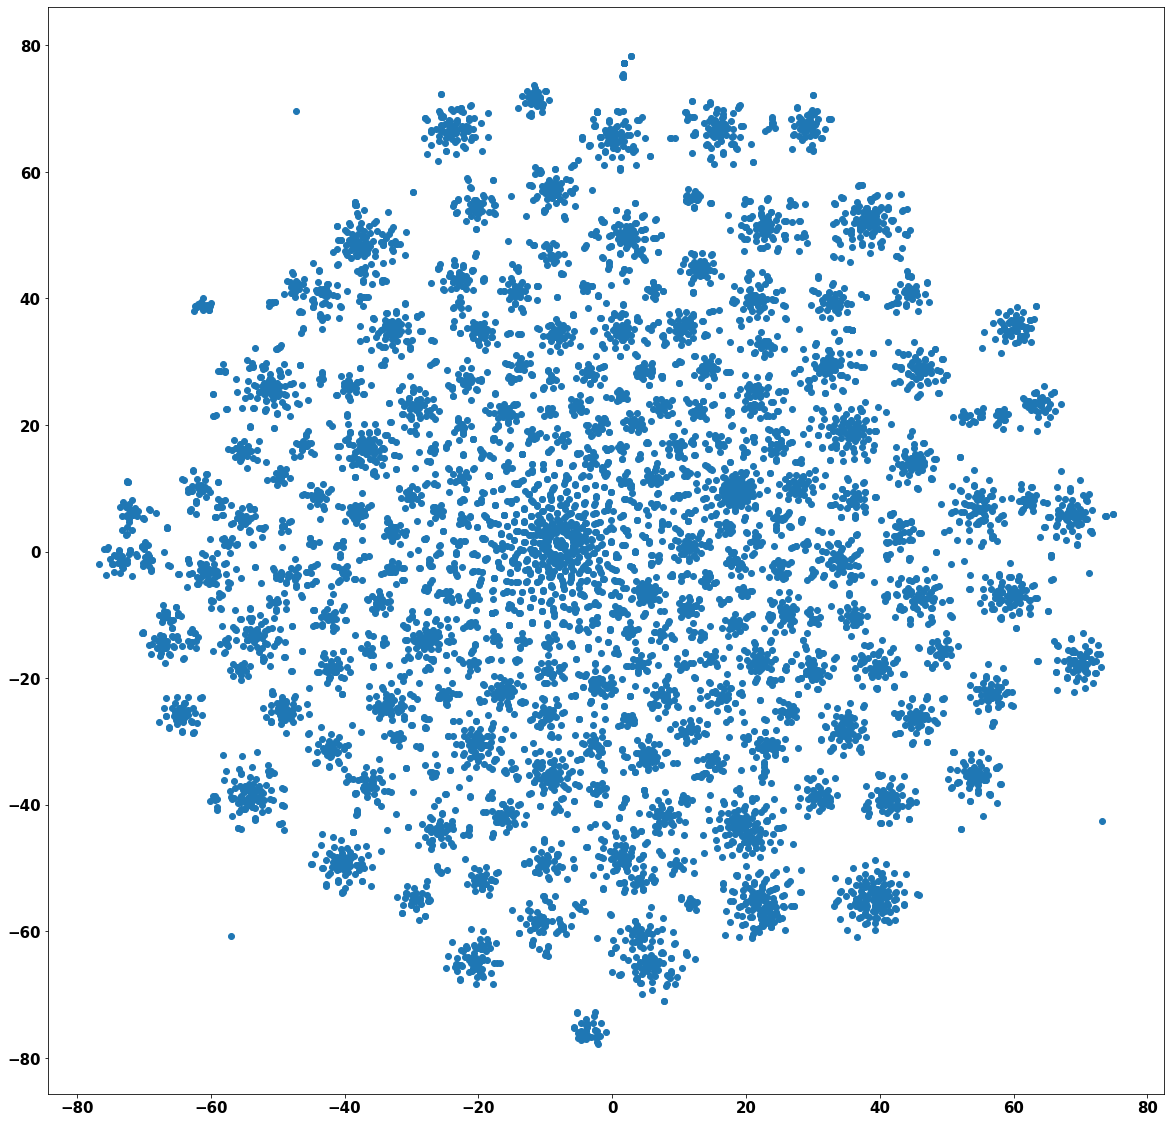

In [58]:
plt.figure(figsize=(20,20))
plt.scatter(x_tsne[:,0],x_tsne[:,1])
plt.show()

# Clustering préliminaire

Naivement, on applique kmeans avec plusieurs valeurs de k.

In [7]:
%%time
random.seed(42)

# kmeans
km_2 = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=1, 
            max_iter=100,
            random_state=26)

# train and predict the cluster of each example
y_km = km_2.fit_predict(tfidf_mat)

Wall time: 9.23 s


In [8]:
# Ne nous dit pas grand chose juste comme ça, on va avoir besoin de comparer avec d'autres méthodes. 
# A FAIRE: itérer sur plusieurs valeurs de k et voir pour quelle valeur l'inertie est la plus petite
# l'inertie la plus petite va évidemment être lorsque k=nombre de tweets. 
# mais on va peut-être voir une grosse drop d'inertie pour une certaines transition k-1 vers k
# ''le coude'' --> Super intéressant d'aller étudier ces tweets créer par ce nombre ''optimale'' de cluster!!!!
print('inertie: %.2f' % km_2.inertia_)

inertie: 99203.81


In [9]:
print(np.sum(y_km==0))
print(np.sum(y_km==1))

95356
4644


**NE PAS RUNNER LA PROCHAINE CELLULE.**

In [44]:
'''
# Je vais itéré sur chacun des random state possible pour essayer de retrouver lui des trump tweets.....

random_states=np.arange(1560)
good_state=[]
sum_0_list=[]
sum_1_list=[]

for state in random_states:
    print(state)
    random.seed(42)

    # kmeans
    km_2 = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=1, 
            max_iter=100,
            random_state=state)

    # train and predict the cluster of each example
    y_km = km_2.fit_predict(tfidf_mat)
    
    sum_0=np.sum(y_km==0)
    sum_1=np.sum(y_km==1)
    sum_0_list.append(sum_0)
    sum_1_list.append(sum_1)
    print(sum_0)
    print(sum_1)
    
    if (sum_0==4644):
        good_state.append(state)
        print('fini sum_0')
        break
        
    if (sum_1==4644):
        good_state.append(state)
        print('fini sum_1')
        break
        
'''     

"\n# Je vais itéré sur chacun des random state possible pour essayer de retrouver lui des trump tweets.....\n\nrandom_states=np.arange(1560)\ngood_state=[]\nsum_0_list=[]\nsum_1_list=[]\n\nfor state in random_states:\n    print(state)\n    random.seed(42)\n\n    # kmeans\n    km_2 = KMeans(n_clusters=2, \n            init='k-means++', \n            n_init=1, \n            max_iter=100,\n            random_state=state)\n\n    # train and predict the cluster of each example\n    y_km = km_2.fit_predict(tfidf_mat)\n    \n    sum_0=np.sum(y_km==0)\n    sum_1=np.sum(y_km==1)\n    sum_0_list.append(sum_0)\n    sum_1_list.append(sum_1)\n    print(sum_0)\n    print(sum_1)\n    \n    if (sum_0==4644):\n        good_state.append(state)\n        print('fini sum_0')\n        break\n        \n    if (sum_1==4644):\n        good_state.append(state)\n        print('fini sum_1')\n        break\n        \n"

In [ ]:
print(good_state)
print(sum_0_list)
print(sum_1_list)

# dumping
#with open('sum_0.txt', 'wb') as file:
#    pickle.dump(sum_0, file)
#    
#with open('sum_1.txt', 'wb') as file:
#    pickle.dump(sum_1, file)
#    
#with open('good_state.txt', 'wb') as file:
#    pickle.dump(good_state, file)


# Re-load
#with open ('sum_0.txt', 'rb') as file:
#    sum_0 = pickle.load(file)
#with open ('sum_1.txt', 'rb') as file:
#    sum_1 = pickle.load(file)
#with open ('good_state.txt', 'rb') as file:
#    good_state = pickle.load(file)



In [10]:

# Index des tweets du cluster 0 (dans df_sample, filtered_tokens et tfidf_mat)
index_0=[]
# Index des tweets du cluster 1 (dans df_sample filtered_tokens et tfidf_mat)
index_1=[]
for i in range(len(y_km)):
    if y_km[i]==0:
        index_0.append(i)
    else:
        index_1.append(i)
        print(df_sample['text'][i])



RT @POLITICOLive: “Regulating in the Trump Era: The Case of the FDA” w/ @ScottGottliebMD now on https://t.co/jr9m23eSjh. Brought to you by…
Dem senator: Trump Jr. may have given "false testimony" about meeting with foreign nationals https://t.co/tTm7lL0TIL https://t.co/vXgFoaJKZP
Merkel: Europe 'can no longer rely on allies' after Trump and Brexit https://t.co/NAbhRvZlSg
RT @markknoller: At 1 hr and 5 mins  Pres Trump's Singapore news conference was his 2nd longest to date. His WH Q&amp;A session on Feb 16  2017…
Trump administration moves to OK Alaska bear hunting with doughnuts  bacon https://t.co/IE4SQfFkfj
How @kdeleon rose from poverty to lead California's resistance to the Trump administration.  https://t.co/DUJztjbRqL
Trump says some 'major' portions of the world 'are going to hell' https://t.co/XlT8WMZwYy
'Your silence and amnesia is complicity': Cory Booker goes viral in attack on Trump's vulgar immigration comment https://t.co/KhVzmeqzMa
A member of Trump's vote fraud panel i

Donald Trump laments 'ridiculous' judgement of his first 100 days  after shambolic first 100 days https://t.co/JNWVZjCfbG
Are you bothered by President Trump's reported use of an expletive to describe certain countries during immigration… https://t.co/mdw5w9jPs9
#TheSift: @JeffFlake attempts to block Trump tariffs https://t.co/z41ZoRQSlP @EvanWilt_ https://t.co/q5Zh0171Rq
Canada's Girl Guides have canceled all travel to the United States due to Trump's immigration ban… https://t.co/Lyk8Klotgm
Great America PAC spends $6k for online voter contact in support of Donald Trump: https://t.co/wM2AiRzqKY
.@HardballChris: Trump thinks he's above the law. With Mueller  he's not. WATCH: https://t.co/bAv1EeOX2T
'I think Theresa May should cancel Trumps visit to the UK... we have to stick by our principles' says Lord Dubs aft… https://t.co/SzZT2xydwc
Donald Trump’s G20 speech owed a lot to Putin https://t.co/Ppo2vkyG2i
Anthony Scaramucci Mum On Goodbyes to Trump  Send-off Message for Gen. Kelly htt

“At least 300 people protesting President Donald Trump and the separation of families at the U.S.-Mexico border are… https://t.co/G5112fjan4
Russia moves to pry Turkey away from the West—and undermine NATO—as Trump weighs a Syria exit  @yarotrof writes https://t.co/dOU726P5RX
.@HardballChris: If Washington is a swamp  Trump's the swamp fox. WATCH: https://t.co/vS8P3kM8hn
RT @JenniferShutt: Trump says "one way or another Mexico will pay for the wall. It may be through reimbursement."
Trump's Jerusalem decision alarms world leaders https://t.co/r4SsmuReF1
In “he said  he said” with President Trump  fired FBI Director James Comey has a distinct advantage on Capitol Hill… https://t.co/kTxwOaaQGY
Trump  race relations topics at Delta group's Little Rock meeting. What they said about voters in rural America » https://t.co/5rS2wbnkyp
The bonuses were credited to federal tax reform  which President Donald Trump signed into law Dec. 22. https://t.co/61Yii8jWr2
Donald Trump once told a 17-year-o

Stephen Colbert pitted Donald Trump and Rex Tillerson against each other in the Thunderdome https://t.co/L06Cwu9vb9 https://t.co/a4nPsyZiIV
Trump's new White House chief of staff has one key asset: Ivanka and Kushner's support https://t.co/gWsvNrzqio https://t.co/OtX66Adsio
President Trump's Lies: The Definitive List https://t.co/6u7OmxDhta https://t.co/CJoO4b3lze
Trump  Kim co-star in U.S.-made summit film mixing propaganda  Hollywood https://t.co/u75mlMmRQl https://t.co/0PJr3TDv0y
.@PressSec on Pres. Trump's feuds with GOP senators: "People didn't elect him to be weak  they elected him to be st… https://t.co/VUlw1muRiP
President Trump is speaking now. Watch live: https://t.co/8g7NMlfKJD
The Donald has landed! Trump touches down in UK for first visit https://t.co/GjXOFKQFTm https://t.co/4xkUjBqRT0
Ivanka Trump's interviews have gone viral  but not for the reason she wanted https://t.co/q577FJRsi8
Trump accuses Facebook of being 'anti-Trump' https://t.co/YI0IJtDPTP via @jguynn
DC resta

In [6]:
# dumping
#with open('index_trump.txt', 'wb') as file:
#    pickle.dump(index_1, file)
#    
#with open('index_pas_trump.txt', 'wb') as file:
#    pickle.dump(index_0, file)
# Re-load
with open ('results/index_trump.txt', 'rb') as file:
    index_1 = pickle.load(file)
with open ('results/index_pas_trump.txt', 'rb') as file:
    index_0 = pickle.load(file)


In [7]:
trump_index = tfidf.vocabulary_['trump']


# est ce que le token 'trump' est dans tous les tweets du cluster 1
nb_cluster_1 = len(index_1)
nb_cluster_1_trump=np.sum(tfidf_mat[index_1][:,trump_index]!=0)
nb_cluster_1_pas_trump=np.sum(tfidf_mat[index_1][:,trump_index]!=0)
percent_cluster_1_trump=nb_cluster_1_trump/nb_cluster_1
print("Pourcentage des tweets dans le cluster 1 contenant le token 'trump' ")
print(percent_cluster_1_trump)
print("\n")
print("Voici les tweets du cluster 1 qui n'ont pas le token 'trump':")

# On print les tweets du cluster 1 qui ne possède pas le token ''trump''.
compteur=0
for index in index_1:
    value=tfidf_mat[index][:,trump_index]!=0
    if value == False:
        print(index)
        print(df_sample['text'][index])
        print(filtered_tokens[index])
        print('\n')


Pourcentage des tweets dans le cluster 1 contenant le token 'trump' 
0.9989233419465977


Voici les tweets du cluster 1 qui n'ont pas le token 'trump':


C:\Users\etien\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


28937
Both campaigns  along with President Obama and former President Bill Clinton  will be in town this week. #election https://t.co/HPwvaWXPA9
['campaign', 'along', 'presid', 'obama', 'former', 'presid', 'bill', 'clinton', 'town', 'week']


65623
JUST IN: Pentagon on president's transgender policy tweets: “We refer all questions about the president's statement… https://t.co/5wtY2qwmhU
['pentagon', 'presid', 'transgend', 'polici', 'tweet', '“', 'refer', 'question', 'presid', 'statement', '…']


80165
Obama’s Failed Presidency https://t.co/eHa8xO3Y38 VIA @NRO @ConradMBlack
['obama', '’', 'fail', 'presid']


83621
'Not My President' protests break out across the country on Presidents' Day. https://t.co/O0pXTKDQ3y https://t.co/80uBvzzUta
['presid', 'protest', 'break', 'across', 'countri', 'presid', 'day']


94259
JUST IN: Russian President Vladimir Putin arrives in Helsinki for a one-on-one summit with US President Donald Trum… https://t.co/bxHnATNt1j
['russian', 'presid', 'vladimir', 'p

In [8]:
# regardons la distributions (histogramme) des comptes twitters faisant partie du cluster_1 (celui de trump)
trump_par_compte=df_sample['user_name'][index_1].value_counts()
print("Nombre de tweet du cluster 1 provenant des comptes suivant")
print(trump_par_compte)

Nombre de tweet du cluster 1 provenant des comptes suivant
The Hill                      220
POLITICO                      109
The Independent                99
Washington Examiner            88
CNN Politics                   81
The Washington Post            71
ABC News Politics              53
Newsweek                       52
CNN                            51
HuffPost Politics              48
Reuters                        45
ABC News                       43
Bloomberg Politics             39
Haaretz.com                    39
MSNBC                          37
The New York Times             36
Fox News                       34
Reuters Politics               33
The Wall Street Journal        33
NYT Politics                   32
CBS News                       32
AP Politics                    32
The Boston Globe               30
Business Insider               30
Bloomberg                      29
The Guardian                   28
ThinkProgress                  27
Hardball               

Intégration de notion de systèmes de recommendations: si tu aimes ca voir des tweets de trump, abonnes-toi aux comptes *The Hill* ,  *POLITICO* et *The Independent*.

In [21]:
# Regardons combien de pourcentage des tweets de ''The Hill, ''POLITICO'' et ''The Indepedent'' contienne le token ''trump''
# (bref, beaucoup de tweets mentionnant trump viennent d'eux, mais est-ce que ca représente un gros pourcent des tweets que chacun d'eux).
# ON ASSUME QUE CLUSTER 1 REPRÉSENTE LA VÉRITÉ!!!!! (on ne regarde pas dans tfidf_mat, on s'appuie sur index_1)
# Mais on a vu que les clusters sont bon à 99%..... Donc quand même acceptable comme marge d'erreur.

compte_vect=[]
percent_vect=[]
N=5
freq_vect=[220,109,99,88,81]
comptes=trump_par_compte.index[0:N] # (Les N comptes qui ont le plus de tweets dans le cluster 1).
for compte in comptes:
    nb_compte=len(df_sample[df_sample['user_name']==compte])
    percent_compte=trump_par_compte[compte]/nb_compte
    compte_vect.append(compte)
    percent_vect.append(round(100*percent_compte,2))
    df_test = pd.DataFrame(list(zip(compte_vect,freq_vect, percent_vect)), 
               columns =['Auteur','Fréquence', 'Proportion (%)']) 
    #print(str(round(100*percent_compte,2))+'% des tweets du compte '+str(compte)+' mentionnent Trump')
    
print(df_test)


                Auteur  Fréquence  Proportion (%)
0             The Hill        220           45.27
1             POLITICO        109           32.06
2      The Independent         99            9.93
3  Washington Examiner         88           33.08
4         CNN Politics         81           40.50


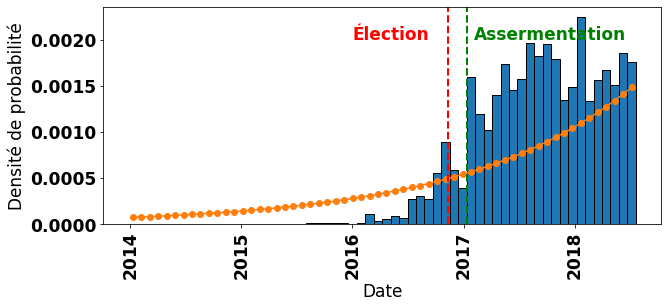

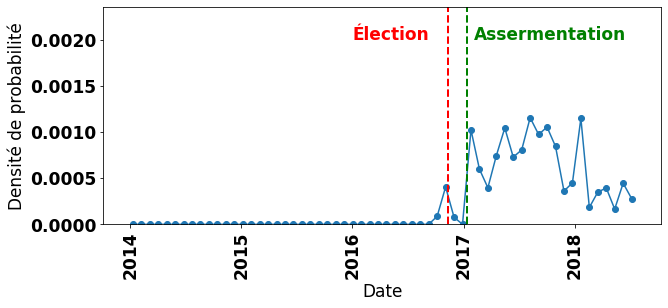

(735145.5715734954, 736977.983160301)


In [213]:
# Visualisons la distirbution des tweets du cluster 1 dans le temps
# (on assume encore que le cluster 1 est la vérité de ''tweets de trump'').

# Points de références: dates de l'élection de de l'entré en fonction (assermentation) de Trump
election_str="2016-11-09T15:36:19.000000000"
election=np.datetime64(election_str)
assermentation_str="2017-01-09T15:36:19.000000000"
assermentation=np.datetime64(assermentation_str)

# histogramme
trump_created_at=df_sample['created_at'][index_1]
delta=(np.max(trump_created_at)-np.min(trump_created_at))/10


plt.figure(figsize=(10,4))



hist,bins,patches=plt.hist(trump_created_at, edgecolor='black', bins=60,density=True)


new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)
plt.plot(new_bins,background(new_bins),'-o')

plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
#######################################################plt.title('Date de création des tweets mentionnant Trump (cluster 1)')
plt.axvline(election, color='red', linestyle='dashed', linewidth=2)
plt.axvline(assermentation,color='green', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2016-01-01T15:36:19.000000000"), 0.002, 'Élection', color='red')
plt.text(np.datetime64("2017-02-01T15:36:19.000000000"), 0.002, 'Assermentation', color='green')
plt.xticks(rotation=90)
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()

f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(election, color='red', linestyle='dashed', linewidth=2)
plt.axvline(assermentation,color='green', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2016-01-01T15:36:19.000000000"), 0.002, 'Élection', color='red')
plt.text(np.datetime64("2017-02-01T15:36:19.000000000"), 0.002, 'Assermentation', color='green')
plt.xticks(rotation=90)
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()

print(a)


On voit que c'est APRÈS être entré en fonction qu'il y a beaucoup plus de tweets mentionnant Trump!! Pas durant sa campagne.

In [ ]:
# Distributions dans le temps (6 à faire)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)


## messages automatisé
index=dict_exp['k=350']['5']
dates=df_sample['created_at'][index]
plt.figure(figsize=(10,4))
hist, bins, patches=plt.hist(dates, edgecolor='black',bins=60,density=True)
new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)
plt.plot(new_bins,background(new_bins),'-o')
############################################################################plt.title("Temporalité des tweets automatisés")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()


f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(np.datetime64("2013-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2014-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2015-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2016-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2017-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2018-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2019-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()





In [16]:
# est ce que aucun tweet du cluster 0 contient le token 'trump'
nb_cluster_0 = len(index_0)
nb_cluster_0_pas_trump=np.sum(tfidf_mat[index_0][:,trump_index]==0)
nb_cluster_0_trump=np.sum(tfidf_mat[index_0][:,trump_index]!=0)
percent_cluster_0_pas_trump=nb_cluster_0_pas_trump/nb_cluster_0

print(nb_cluster_0_pas_trump)
print(nb_cluster_0_trump)

print('\n')
print("Pourcentage des tweets du cluster 0 n'ayant pas le token 'trump':")
print(percent_cluster_0_pas_trump)

95253
103


Pourcentage des tweets du cluster 0 n'ayant pas le token 'trump':
0.998919837241495


Le tweet d'index 94259 possède même le token ''trum''!! 

On voit quand même que les 5 seuls tweets ne contenant pas le token ''trump'' du cluster parle quand même de président américain. 

Le token ''presid'' doit être très proche sémantiquemment du token ''trump''.

**SI JE FAIS UN KMEANS AVEC LES BIGRAM ET K=3, EST CE QUE JE VAIS OBTENIR UN CLUSTER TRUMP JR :o**

On utilise le même random state initial.

In [17]:
%%time
random.seed(42)

# kmeans
km_2_bi = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=1, 
            max_iter=100,
            random_state=26)

# train and predict the cluster of each example
y_km_bigram = km_2_bi.fit_predict(tfidf_bigram_mat)

Wall time: 12 s


In [18]:
print('inertie: %.2f' % km_2_bi.inertia_)

inertie: 99581.11


In [19]:
print(np.sum(y_km_bigram==0))
print(np.sum(y_km_bigram==1))

# Index des tweets du cluster 0 (dans df_sample, filtered_tokens et tfidf_mat)
index_0_bi=[]
# Index des tweets du cluster 1 (dans df_sample filtered_tokens et tfidf_mat)
index_1_bi=[]
for i in range(len(y_km_bigram)):
    if y_km_bigram[i]==0:
        index_0_bi.append(i)
    else:
        index_1_bi.append(i)


85114
14886


Est-ce que la composition des cluster 0 et 1 fait à partir de tfidf_bigram_mat son similaires?

On a une petite différence de taille (unigram: 4644 et 95 5536, bigram: 2432 et 97 568).


In [20]:
# On fait l'intersection de index_1 et index_bi_1
common_1=set(index_1_bi).intersection(set(index_1))
common_0=set(index_0_bi).intersection(set(index_0))

print(len(common_0))
print(len(common_1))
# TRÈS PEU D'INDEX EN COMMUN!!!! Allons-voir qu'est-ce que c'est tweets ont en commun.
for element in common_1:
    print('\n')
    print(element)
    print(df_sample['text'][int(element)])
    print(filtered_tokens[int(element)])
    print('\n')

81454
984


20480
Trump  avoiding talk of gun policy  tells Las Vegas shooting survivors: 'We are there for you'… https://t.co/GK4YlPDbgr
['trump', 'avoid', 'talk', 'gun', 'polici', 'tell', 'las', 'vega', 'shoot', 'survivor', '…']




96260
‘The president clearly set himself up’: Trump’s stock market miscalculation. @morningmoneyben reports from New York… https://t.co/QbF8gv2Kuq
['‘', 'presid', 'clear', 'set', '’', 'trump', '’', 'stock', 'market', 'miscalcul', 'morningmoneyben', 'report', 'new', 'york', '…']




30727
While many disparage President Donald J. Trump's solution as a return to failed policies of the past  some recogniz… https://t.co/1XoaMfWnuE
['mani', 'disparag', 'presid', 'donald', 'j', 'trump', 'solut', 'return', 'fail', 'polici', 'past', 'recogniz', '…']




81928
The White House’s chief lawyer told President Trump in January he believed then-national security adviser Michael F… https://t.co/UbHDOUuuNr
['white', 'hous', '’', 'chief', 'lawyer', 'told', 'presid', 'trump'

48510
As Trump assesses how to respond to the alleged chemical attack in Syria that killed dozens of civilians  lawmakers… https://t.co/Q1FTvT4Ztt
['trump', 'assess', 'respond', 'alleg', 'chemic', 'attack', 'syria', 'kill', 'dozen', 'civilian', 'lawmak', '…']




3456
Donald Trump reportedly wrote his own doctor's note detailing his "extraordinary" physical strength and stamina. Tw… https://t.co/YplHitUngO
['donald', 'trump', 'report', 'wrote', 'doctor', 'note', 'detail', 'extraordinari', 'physic', 'strength', 'stamina', 'tw', '…']




95622
Trump Adviser Tony Perkins isn’t your usual Christian fundamentalist  writes @jaymichaelson. Just one hateful examp… https://t.co/ATw3g4XF3K
['trump', 'advis', 'toni', 'perkin', '’', 'usual', 'christian', 'fundamentalist', 'write', 'jaymichaelson', 'one', 'hate', 'examp', '…']




71051
President Donald Trump's administration is planning to impose tariffs on European steel and aluminum imports after… https://t.co/aRzca1lOpc
['presid', 'donald', 'tr

On voit le bigram 'presid trump' très présent dans l'intersection du cluster unigram et le cluster (bigram+unigram).

Mais pas nécessairement très représentatif de comparer les deux méthodes, l'initialisation est trop variante. Puisque ceci ne sont que des résultats préliminaires, nous n'avons pas pousser au maximum la robustesse (max 100 itérations et seulement une configuration d'initialisation). 

Bref, ont a été très chanceux de tomber sur ce clustering. Les prochains résultats seront plus robsutes (moyenner sur plusieurs initialisations).

Nous avons 984 tweets en commun dans le cluster qui semble être un peu également *trump* dans le kmeans des bigrams.

In [21]:
trump_index = tfidf_bigram.vocabulary_['trump']
print(trump_index)

613452


On refait kmeans avec plusieurs valeurs de k, mais on fait de la réduction de dimension avant (SVD). Est-ce que la composition des k clusters est similaires? Si oui, il vaudrait la peine de travailler dans l'espace des dimensions réduites.


On garde la même intialisation, mais on applique kmeans sur une matrice de dimensions réduites (par la SVD).

Très fort probablement que ça ne va pas marché, puisque comme expliquer plustôt, nous n'avons pas fait une méthode super robuste d'initialisation pour ces premiers résultats

In [22]:
%%time
# Define & Run SVD
svd = TruncatedSVD(n_components=100)
x_svd = svd.fit_transform(tfidf_mat) # map the data to the new reduced space

Wall time: 6.99 s


In [23]:
%%time
random.seed(42)

# kmeans
km_svd = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=1, 
            max_iter=100,
            random_state=26)

# train and predict the cluster of each example
y_svd = km_svd.fit_predict(x_svd)

Wall time: 547 ms


In [24]:
print(np.sum(y_svd==0))
print(np.sum(y_svd==1))

# Index des tweets du cluster 0 (dans df_sample, filtered_tokens et tfidf_mat)
index_0_svd=[]
# Index des tweets du cluster 1 (dans df_sample filtered_tokens et tfidf_mat)
index_1_svd=[]
for i in range(len(y_svd)):
    if y_svd[i]==0:
        index_0_svd.append(i)
    else:
        index_1_svd.append(i)


2128
97872


In [25]:
for index in index_0_svd:
    print('\n')
    print(index)
    print(df_sample['text'][index])
    print(filtered_tokens[index])
    print('\n')



24
#Ctnews Police: Man angry about parking stabbed 2  mowed down others in New York https://t.co/mPi7deaiZr
['polic', 'man', 'angri', 'park', 'stab', 'mow', 'new', 'york']




36
Police arrest man in Minerva  charge him in death of Niles baby.   https://t.co/jvmMPRLzFO
['polic', 'arrest', 'man', 'minerva', 'charg', 'death', 'nile', 'babi']




39
The High Price of Police Transparency in Columbia https://t.co/WxXpU6I3Ri https://t.co/SitN4sfaAF
['high', 'price', 'polic', 'transpar', 'columbia']




64
Police officer who Tasered Dalian Atkinson was not wearing a body camera https://t.co/xjaIOy99ES
['polic', 'offic', 'taser', 'dalian', 'atkinson', 'wear', 'bodi', 'camera']




94
Eufaula police apprehend three robbery suspects  search for fourth https://t.co/vR9kTi5XZT
['eufaula', 'polic', 'apprehend', 'three', 'robberi', 'suspect', 'search', 'fourth']




143
.@POTUS: "Hillary knows... that we can honor police and treat every community fairly." #DemsInPhilly #DemConvention https://t.co/

The 2700 block of East Pflugerville Parkway has been reopened for normal traffic  police said.
['block', 'east', 'pflugervill', 'parkway', 'reopen', 'normal', 'traffic', 'polic', 'said']




34697
Police investigating death of man with stab wound https://t.co/7JZo8rwhSs https://t.co/nxNOEFSyV9
['polic', 'investig', 'death', 'man', 'stab', 'wound']




34732
Malaysia police arrest 7 boys linked to deadly school fire https://t.co/ExMOlB5mYF
['malaysia', 'polic', 'arrest', 'boy', 'link', 'dead', 'school', 'fire']




34750
Police say a woman sustained a cut deep enough to expose the bone when her leg was tapped by a subway train in Bost… https://t.co/OkPrnxpzsc
['polic', 'say', 'woman', 'sustain', 'cut', 'deep', 'enough', 'expos', 'bone', 'leg', 'tap', 'subway', 'train', 'bost', '…']




34798
Bob Marley’s granddaughter tied to encounter with Rialto police  unlicensed Airbnb rental https://t.co/6NsAy5cKUC https://t.co/9k5CImoC7y
['bob', 'marley', '’', 'granddaught', 'tie', 'encount', 'ria




64914
We're hearing reports of ongoing heavy police activity this a.m. near Centerra shops at I-25/Highway 34. @AliciaStice is en route
['hear', 'report', 'ongo', 'heavi', 'polic', 'activ', 'near', 'centerra', 'shop', 'ihighway', 'aliciastic', 'en', 'rout']




64985
Prosecutors won't seek the death penalty against a former police chief charged with killing a man… https://t.co/qXnatKAbYg
['prosecutor', 'wont', 'seek', 'death', 'penalti', 'former', 'polic', 'chief', 'charg', 'kill', 'man', '…']




64994
Suspect who shot Greensboro police officer during traffic stop dies from injuries (Update) (Video) https://t.co/hgvaukwgC2
['suspect', 'shot', 'greensboro', 'polic', 'offic', 'dure', 'traffic', 'stop', 'die', 'injuri', 'updat', 'video']




65108
Two had THC oil in motor vehicle stop  Madison police say. https://t.co/AWugd3skXp
['two', 'thc', 'oil', 'motor', 'vehicl', 'stop', 'madison', 'polic', 'say']




65141
Sergei Skripal's cat and guinea pigs die after police seal house https:/





96508
Rhode Island Police: 2 children taken in 1985 found in Houston  parent arrested https://t.co/aSYNfzh8KT
['rhode', 'island', 'polic', 'children', 'taken', 'found', 'houston', 'parent', 'arrest']




96519
Eugene police credit bystanders with helping locate an alleged hit-and-run driver https://t.co/VItIFpp2Qy #RGnews https://t.co/J26LstczxS
['eugen', 'polic', 'credit', 'bystand', 'help', 'locat', 'alleg', 'hitandrun', 'driver']




96541
Bristol police  area departments kick off distracted driving campaign https://t.co/bZqvrPcc9Y
['bristol', 'polic', 'area', 'depart', 'kick', 'distract', 'drive', 'campaign']




96588
Police: Upstate man ambushed woman  tried to kill her with knife https://t.co/xZs5FgFxfR https://t.co/EPkjpjr9j7
['polic', 'upstat', 'man', 'ambush', 'woman', 'tri', 'kill', 'knife']




96638
Drunken driver from Hockessin crashes into sign  fence and leads police on foot chase in Md #NetDE https://t.co/iT6JynebnT
['drunken', 'driver', 'hockessin', 'crash', 'sign

Avec EXACTEMENT les même conditions initials pour l'algorithme kmeans, on obtient le cluster qui parle de la police (lorsque SVD est appliqué avant de faire kmeans).

**FIN DE NOS PREMIERS RÉSULTATS UN PEU BROCHE À FOIN: méthode pas assez stable, absolument besoin de moyenner sur plusieurs configurations initials**

# PROCHAINES ÉTAPES
- moyenner nos Kmeans sur plusieurs initilisation.
- runner kmeans avec k=2,3,4,5,6,7,8,9,etc
- À chaque fois, calculer l'inertie du cluster (devrait descendre)
- Aller lire les tweets de chaque cluster pour le k juste après le ''elbow''.

In [38]:
%%time
# Je refais kmeans avec k=2 et le même random state de 26, MAIS ON MOEYNNE SUR BEAUCOUP D'INITIALISATION 
# et on augmente le nombre d'itération max par application (on veut obtenir des résultats un peu plus robustes.)

# -----> différent init = va nous donner les cluster avec la plus petites inertie au terme de tous les essaies.
# Clairement on ne va pas retrouver trump, parce que quand k=2 on ne trouve pas 2 cluster, on trouve un thèmes et ''le reste''
# on commence quand même avec random_state=26 pour peut-être retrouver trump

# kmeans
km_2 = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=60, 
            max_iter=100,
            random_state=26)
y_km_2 = km_2.fit_predict(tfidf_mat)

Wall time: 10min 30s


7730


C'est relativement long même de faire 60 initialisation lorsque l'on utilise toutes les dimensions. 

Pour réellement pouvoir généré des résultats dans un temps raisonnable, nous allons faire de la réduction de dimension.

Nous voulions au moins faire kmeans avec k=2 sans réduire les dimensions et avec n_init plus grand que 1 pour voir la ''qualité'' du cluster de Trump. En effet, lorsque l'on essaie 60 initialisation différentes, seule celle avec l'inertie la plus petite est gardé. Si à la sortie du kmeans, k=2, random_state=26, n_init=60 on a toujours le cluster de trump, alors cela nous confirme que c'est potentiellement une des meilleure manière de séparé notre jeu de données en simplement 2 clusters.

In [58]:
# On valide que nous avons les mêmes index ou non que lorsque l'on a fait n_init=1
print(np.sum(y_km_2==1))
# ON N'OBTIENT PAS LES MÊME CLUSTER (simplement par le nombre d'éléments I can tell).
# Mais après une dizaine d'itération, on avait encore les 'trump' clusters de 4464 éléments.
print('inertie: %.2f' % km_2.inertia_)
# Inertie très semblable (même ordre de grandeur, pour trump on avait 99203.81)


# On regarde les tweets dans le cluster 1
# Index des tweets du cluster 0 (dans df_sample, filtered_tokens et tfidf_mat)
index_0=[]
# Index des tweets du cluster 1 (dans df_sample filtered_tokens et tfidf_mat)
index_1=[]
for i in range(len(y_km_2)):
    if y_km_2[i]==0:
        index_0.append(i)
    else:
        index_1.append(i)
        print('\n')
        print(i)
        print(df_sample['text'][i])
        print(filtered_tokens[i])




7730
inertie: 99141.70


4
RT @LGAairport: Approximately 736 flights scheduled for today have been canceled due to the nor’easter. Please confirm flight status before…
['rt', 'lgaairport', 'approxim', 'flight', 'schedul', 'today', 'cancel', 'due', '’', 'easter', 'pleas', 'confirm', 'flight', 'status', 'befor', '…']


14
Saratogian’s former circulation director  Joseph Anderson  who is awaiting a heart transplant  grateful for support https://t.co/OTmKHHRZ4B
['saratogian', '’', 'former', 'circul', 'director', 'joseph', 'anderson', 'await', 'heart', 'transplant', 'grate', 'support']


27
Oppenheimer Weighs in on ILG Inc’s Q1 2018 Earnings $ILG https://t.co/na65C2vwSH #stocks
['oppenheim', 'weigh', 'ilg', 'inc', '’', 'q', 'earn', 'ilg']


28
Investors flock to Spain’s jumbo sale of 10-year sovereign debt https://t.co/OK2UwkOvHl
['investor', 'flock', 'spain', '’', 'jumbo', 'sale', 'year', 'sovereign', 'debt']


35
Who’s your company’s successor? https://t.co/HRVs9xOneg
['’', 'compani', '’'

Senate: ‘Renewed FISA Legislation Imperative In Protecting The Few American Freedoms That Will Remain’… https://t.co/n9bLgYUrrK
['senat', '‘', 'renew', 'fisa', 'legisl', 'imper', 'protect', 'american', 'freedom', 'remain', '’', '…']


11374
‘Bad news’: Palm Beach restaurant manager’s immigration meeting changed https://t.co/S5iFXhsioI
['‘', 'bad', 'news', '’', 'palm', 'beach', 'restaur', 'manag', '’', 'immigr', 'meet', 'chang']


11380
Top-ranked Tech men win Big 12 track title  celebrate Oglesby’s legacy https://t.co/u0YDzxrNn9
['toprank', 'tech', 'men', 'win', 'big', 'track', 'titl', 'celebr', 'oglesbi', '’', 'legaci']


11381
Jasmine Walsh  Dalhousie’s assistant vice-president of human resources  said Tuesday Dalhousie has been “deliberate… https://t.co/oo8Ivvr4sh
['jasmin', 'walsh', 'dalhousi', '’', 'assist', 'vicepresid', 'human', 'resourc', 'said', 'tuesday', 'dalhousi', '“', 'deliber', '…']


11387
Soccer chat absent at China’s #19thPartyCongress  but message to investors is sti

Democracy Dies In Amazon’s Warehouses https://t.co/ueU8qMtdss https://t.co/oGcx5VjApc
['democraci', 'die', 'amazon', '’', 'warehous']


21856
Warrantless Search of Sex Offender’s Mobile Phone OK https://t.co/1MAa0UNtoH https://t.co/Er8zyHuODR
['warrantless', 'search', 'sex', 'offend', '’', 'mobil', 'phone', 'ok']


21877
Monday’s scoreboard - PREP GIRLS BASKETBALL Saturday’s Results Northern 10 Conference Buckeye Central 63  Bucyr... https://t.co/Qs8wtjpyTF
['monday', '’', 'scoreboard', 'prep', 'girl', 'basketbal', 'saturday', '’', 'result', 'northern', 'confer', 'buckey', 'central', 'bucyr']


21904
RT @theodenjanes: "If someone asks me to share my faith  I can’t say no to that. I feel like that’s God asking me to do something for him."…
['rt', 'theodenjan', 'someon', 'ask', 'share', 'faith', '’', 'say', 'feel', 'like', '’', 'god', 'ask', 'someth', '…']


21907
Don't miss Theatre South’s Improv Troupe this Friday. https://t.co/9bycJFCBm9 https://t.co/zGhzd21kCS
['dont', 'miss', 'theat

33050
If you’re looking for how to improve your sense of humor  you would do well to start by making yourself laugh … https://t.co/IYHoN7GVvf
['’', 'look', 'improv', 'sens', 'humor', 'would', 'well', 'start', 'make', 'laugh', '…']


33052
Iran Builds Up Its ‘Resistance Economy’ Model With New List of 1300 Banned Imports https://t.co/HwuvTsLy5Y https://t.co/r8dMiFh4vj
['iran', 'build', '‘', 'resist', 'economi', '’', 'model', 'new', 'list', 'ban', 'import']


33101
Our new podcast  “Secrets of the Most Productive People ” explores what’s ruining our sleep—and how to fix it.… https://t.co/u1IpTIEpyx
['new', 'podcast', '“', 'secret', 'product', 'peopl', '”', 'explor', '’', 'ruin', 'sleep', '—', 'fix', '…']


33103
5 charts that show how China’s response to U.S. tariffs is rattling markets https://t.co/yNVrvZ2qTV
['chart', 'show', 'china', '’', 'respons', 'us', 'tariff', 'rattl', 'market']


33111
State Department Exposes The Atrocities Of North Korea’s Brutal Prison Camps https://t.co/pVDW

44311
The auction barn on is home to weekly livestock auctions. Every Sun.  it’s also where John Sexson gives his sermons… https://t.co/FCweX2tKD8
['auction', 'barn', 'home', 'week', 'livestock', 'auction', 'everi', 'sun', '’', 'also', 'john', 'sexson', 'give', 'sermon', '…']


44323
Mayochup: It’s mayonnaise and ketchup already mixed together  and it's a real thing https://t.co/4oNG1v0mpU
['mayochup', '’', 'mayonnais', 'ketchup', 'alreadi', 'mix', 'togeth', 'real', 'thing']


44360
Tim Kaine’s son placed on probation in Minnesota Trump protest https://t.co/swsTJeTXuc https://t.co/mI7GqC26CE
['tim', 'kain', '’', 'son', 'place', 'probat', 'minnesota', 'trump', 'protest']


44367
Park Pickin’s May 6 in Lead Hill https://t.co/OduWFsSpNW
['park', 'pickin', '’', 'may', 'lead', 'hill']


44378
Jim Renacci Announces Bid for Ohio Senate: It’s Time to ‘Put Country First’ https://t.co/sD5jDYSxdv
['jim', 'renacci', 'announc', 'bid', 'ohio', 'senat', '’', 'time', '‘', 'put', 'countri', 'first', '’


55093
Amit Shah tells BJP CMs to push ‘welfare agenda’ https://t.co/cnjhXKJq6u https://t.co/pqaLHPIB4a
['amit', 'shah', 'tell', 'bjp', 'cms', 'push', '‘', 'welfar', 'agenda', '’']


55096
#Putin says he strongly disagrees with ‘end justifies means’ formula https://t.co/DmzGaTEJBU
['say', 'strong', 'disagre', '‘', 'end', 'justifi', 'mean', '’', 'formula']


55115
The keynote speaker was Massachusetts State Senator Linda Dorcena Forry  BC ’96.     https://t.co/IS1YufIvA7
['keynot', 'speaker', 'massachusett', 'state', 'senat', 'linda', 'dorcena', 'forri', 'bc', '’']


55121
Saturday's @Newsday cover: Mom of victim: ‘I’ve got to bury my son for a dirt bike?’ https://t.co/HVwlY7rDaP https://t.co/JMZdsCeu6x
['saturday', 'newsday', 'cover', 'mom', 'victim', '‘', '’', 'got', 'buri', 'son', 'dirt', 'bike', '’']


55129
Sunday’s violence at the California Capitol: An insider view from the beginning: https://t.co/RJ8pQey8dg
['sunday', '’', 'violenc', 'california', 'capitol', 'insid', 'view', 'be

66660
Hello  I’m here and ready to answer your questions about politics  news of the day  congenital heart defect... http://t.co/2v8K4kGkWr
['hello', '’', 'readi', 'answer', 'question', 'polit', 'news', 'day', 'congenit', 'heart', 'defect']


66662
Ravinia Festival’s James Conlon to leave after 2015 season: http://t.co/MT3ScA5eVY
['ravinia', 'festiv', '’', 'jame', 'conlon', 'leav', 'season']


66713
“The word ‘Supernormal’ means above the normal or the average. I’m talking about resilient people here  who have ab… https://t.co/D9wJRkmcOn
['“', 'word', '‘', 'supernorm', '’', 'mean', 'abov', 'normal', 'averag', '’', 'talk', 'resili', 'peopl', 'ab', '…']


66714
.@StephenCurry30 isn’t even the highest paid @warriors player. We have the breakdown: https://t.co/1xg0ketbsp… https://t.co/op1AP3VQs5
['stephencurri', '’', 'even', 'highest', 'paid', 'warrior', 'player', 'breakdown']


66720
State orders probe of special ed system that ‘sounds…broken’ https://t.co/FAMgmz47II via @ctmirror
['state


78352
St. Pius’ Durr invited to McDonald’s All-American game http://t.co/p2GYju6Oyk
['st', 'pius', '’', 'durr', 'invit', 'mcdonald', '’', 'allamerican', 'game']


78357
The Redbirds have become essentially an extension of the St. Louis Cardinals’ maligned bullpen. Still three weeks s… https://t.co/sZryqpFPtk
['redbird', 'becom', 'essenti', 'extens', 'st', 'loui', 'cardin', '’', 'malign', 'bullpen', 'still', 'three', 'week', '…']


78364
Bridgewater’s Soupman is switching gears  expanding services for homeless... https://t.co/1xrVoUKsa3 https://t.co/Oh11i1Opw3
['bridgewat', '’', 'soupman', 'switch', 'gear', 'expand', 'servic', 'homeless']


78391
Electronic Arts’ $EA “Buy” Rating Reiterated at Needham &amp; Company LLC https://t.co/YcpoCuEK2h
['electron', 'art', '’', 'ea', '“', 'buy', '”', 'rate', 'reiter', 'needham', 'amp', 'compani', 'llc']


78392
If you’re PC  it’s apparently okay to use homophobic slurs and sexually assault your employees.… https://t.co/N0pVW9xv4W
['’', 'pc', '’',

['cannabi', 'legal', 'new', 'england', '’', 'slow', 'burn']


89853
Obama’s last world tour as president expected to be dominated by questions about Trump’s plans: https://t.co/qBfSeEEPDg
['obama', '’', 'last', 'world', 'tour', 'presid', 'expect', 'domin', 'question', 'trump', '’', 'plan']


89903
At Trump’s Mar-a-Lago  the price for joining the ‘winter White House’ has doubled  https://t.co/NpXiT4LO4F
['trump', '’', 'maralago', 'price', 'join', '‘', 'winter', 'white', 'hous', '’', 'doubl']


89908
Abbott’s hiring freeze gets no credit as lawmakers plug holes in current Texas budget | @RobertTGarrett #txlege https://t.co/3rmPvTxPL0
['abbott', '’', 'hire', 'freez', 'get', 'credit', 'lawmak', 'plug', 'hole', 'current', 'texa', 'budget', 'roberttgarrett']


89910
Coming up at noon: @jenhab takes your questions on what’s next for the Republican health care bill… https://t.co/onu1dSzKR5
['come', 'noon', 'jenhab', 'take', 'question', '’', 'next', 'republican', 'health', 'care', 'bill', '…']


J'ai vraiment aucune idée du fils conducteur entre tous ces tweets --> Démontre bien que l'inertie n'est pas une mesure ''garantie'' et encore moins qu'elle est compatbile ave ''l'intuition'' d'une personne lisant les tweets.

In [142]:
# Pour chaque tweet du cluster 1, sortir le mot de vocabulaire avec la plus grand valeur dans la tfidf_mat
max_vocab=np.argmax(tfidf_mat[index_1], axis=1)
unique, counts=np.unique(max_vocab, return_counts=True)
unique=np.array(unique)[0]

# On voit que l'on a jamais le même mot de vocabulaire qui est le plus gros tfidf_mat pour deux tweets
print(len(unique))

7730


On regarde les mots dont l'idf est le plus élevé et le plus petit.

Formule pour idf:

\begin{equation}
	\text{idf}_i = \log\left( \frac{N}{\text{df}_i} \right),
\end{equation}


Les mots de vocabulaires avec l'idf le plus petit sont donc les mots les mots plus communs (se retrouvant au moins une fois dans le plus de tweets)

Les mots de vocabulaires avec l'idf le plus grands sont donc les mots les plus rares (se retrouvant au moins un fois dans le moins de tweets).

In [176]:
# Mots les plus communs
idx = (tfidf.idf_).argsort()[:20]
for value in idx:
    print(inv_vocab[value])
    print(tfidf.idf_[value])

…
2.904826191470352
rt
2.969270662613564
’
3.5392038952118265
new
3.978098838331396
trump
4.048510339042647
say
4.218136105927655
us
4.463189173968037
year
4.540469448945663
get
4.63326555031594
state
4.6435337523431395
school
4.68092128441476
counti
4.707053424691608
day
4.726799027137156
today
4.776628368371943
report
4.798257991119302
man
4.803178600466064
polic
4.827691856944396
first
4.8304530183857235
week
4.867537765491596
one
4.8708910620469705


*school* et *trump* sont présent dans beaucoups de tweets de notre base de données. Il n'est donc pas surprenant que les éléments communs entre kmeans=2, random_state=26 pour unigram et (unigram et bigram) sont ceux contenants les tweets avec les tokens *school* et *trump*. 



On voit apparaitre *rt* come token très commun. *rt* signifie *Re-tweet*. Nous aurions dû inclure une étape dans le pre-processing qui aurait été d'enlever le token *rt*. ---> Perfectionnement de la méthodologie a posteriori!!! **Démontre bien que nous sommes critiques de nos résultats.**

In [194]:
# Mots les plus rares
# Des mots completement random (tous le meme idf, donc doivent tous apparaitre juste une fois)
# en effet, log(100 000)=
idx = (-tfidf.idf_).argsort()[:10000]
for value in idx:
    print(inv_vocab[value])
    print(tfidf.idf_[value])

󾍘
11.819788284360284
mikeiveyxc
11.819788284360284
mikelavieri
11.819788284360284
mikelawrencesct
11.819788284360284
mikelebovitz
11.819788284360284
mikelevinca
11.819788284360284
mikemaloneyni
11.819788284360284
mikemcandrew
11.819788284360284
mikemcdtweet
11.819788284360284
mikemeil
11.819788284360284
mikemet
11.819788284360284
mikemmontenewsen
11.819788284360284
mikeibanez
11.819788284360284
mikemongo
11.819788284360284
mikenow
11.819788284360284
mikeofcc
11.819788284360284
mikeonmachin
11.819788284360284
mikepencevp
11.819788284360284
mikeqreport
11.819788284360284
mikerawl
11.819788284360284
mikereiss
11.819788284360284
mikerossupd
11.819788284360284
mikerowework
11.819788284360284
mikesaltsman
11.819788284360284
mikesbghsport
11.819788284360284
mikeneedham
11.819788284360284
mikeshepherdm
11.819788284360284
mikehuttonpt
11.819788284360284
mikehfuch
11.819788284360284
mikandynothem
11.819788284360284
mikayla
11.819788284360284
mikeabccolumbia
11.819788284360284
mikeandmik
11.81978

11.819788284360284
missionhealthnc
11.819788284360284
missionvalleyi
11.819788284360284
wwwshopperstreetcompodcasteaamp
11.819788284360284
mississippian
11.819788284360284
mississippidot
11.819788284360284
mississippinew
11.819788284360284
mississippistarkvill
11.819788284360284
mississippistud
11.819788284360284
missncpag
11.819788284360284
missnuggett
11.819788284360284
missourien
11.819788284360284
missionfoodsnc
11.819788284360284
mirrortonganoxietonganoxi
11.819788284360284
missa
11.819788284360284
misrepres
11.819788284360284
misa
11.819788284360284
misanthrop
11.819788284360284
misappro
11.819788284360284
misbehav
11.819788284360284
miscarri
11.819788284360284
misch
11.819788284360284
mischa
11.819788284360284
mischief
11.819788284360284
mischiev
11.819788284360284
misclassifi
11.819788284360284
wwwtheclauseorg
11.819788284360284
wwwtheaustinvillagercom
11.819788284360284
misconstru
11.819788284360284
misdemeanour
11.819788284360284
misdiagnos
11.819788284360284
mise
11.81978828

11.819788284360284
melancon
11.819788284360284
xavierrhod
11.819788284360284
melaniebuck
11.819788284360284
melaniekirkpat
11.819788284360284
melanycox
11.819788284360284
melanzana
11.819788284360284
melatoninfuel
11.819788284360284
melcroft
11.819788284360284
mekleit
11.819788284360284
meld
11.819788284360284
mehedi
11.819788284360284
mehdi
11.819788284360284
megaread
11.819788284360284
megarecap
11.819788284360284
megaticket
11.819788284360284
megatrip
11.819788284360284
megavulner
11.819788284360284
megawatt
11.819788284360284
megayacht
11.819788284360284
megbarn
11.819788284360284
megdimartino
11.819788284360284
megehe
11.819788284360284
meggschultz
11.819788284360284
mehdirhasan
11.819788284360284
meggwrit
11.819788284360284
meghannelson
11.819788284360284
meghannreport
11.819788284360284
meghanottolini
11.819788284360284
meginnyc
11.819788284360284
megomatz
11.819788284360284
megsbriann
11.819788284360284
megvogelphoto
11.819788284360284
megwochnick
11.819788284360284
mehar
11.81

11.819788284360284
mhtcheeto
11.819788284360284
mhpmbi
11.819788284360284
mguernseyisj
11.819788284360284
mgsphotojourn
11.819788284360284
mgsmiriam
11.819788284360284
mezynieski
11.819788284360284
mfagreensboro
11.819788284360284
mfarrellp
11.819788284360284
mfarussia
11.819788284360284
mfaulknerphotog
11.819788284360284
mfd
11.819788284360284
mfer
11.819788284360284
mffisher
11.819788284360284
mfhsprincip
11.819788284360284
mfin
11.819788284360284
mfinoshinart
11.819788284360284
mfratt
11.819788284360284
mfrizzel
11.819788284360284
mgargyllstenni
11.819788284360284
mgc
11.819788284360284
mgeheren
11.819788284360284
mggalvin
11.819788284360284
mgiacchino
11.819788284360284
mgmadvertis
11.819788284360284
mgmt
11.819788284360284
mgoul
11.819788284360284
mgranvill
11.819788284360284
mgraynew
11.819788284360284
mgrc
11.819788284360284
mgrmc
11.819788284360284
missourioffici
11.819788284360284
megapli
11.819788284360284
missouriserv
11.819788284360284
missourith
11.819788284360284
mou
11.8

11.819788284360284
msabq
11.819788284360284
msabrand
11.819788284360284
msad
11.819788284360284
msall
11.819788284360284
msando
11.819788284360284
msaw
11.819788284360284
mrsslrss
11.819788284360284
msbeatricenh
11.819788284360284
msbrookhaven
11.819788284360284
msbushchel
11.819788284360284
mscheap
11.819788284360284
msd
11.819788284360284
msdstrong
11.819788284360284
msema
11.819788284360284
msen
11.819788284360284
msfarab
11.819788284360284
msfg
11.819788284360284
msfsea
11.819788284360284
msgn
11.819788284360284
msbest
11.819788284360284
msgobel
11.819788284360284
mrsrichey
11.819788284360284
mrslizrog
11.819788284360284
mrhsgrizzli
11.819788284360284
mridangam
11.819788284360284
mrjamesmay
11.819788284360284
mrjamesob
11.819788284360284
mrjoeaston
11.819788284360284
mrjoel
11.819788284360284
mrkrynld
11.819788284360284
mrmarkbeaumont
11.819788284360284
mrmichaelle
11.819788284360284
mrmoneymustach
11.819788284360284
mrns
11.819788284360284
mrsmithap
11.819788284360284
mro
11.81978

11.819788284360284
mlearsongrosso
11.819788284360284
mlexclus
11.819788284360284
mlexmlexclusiveglobalglob
11.819788284360284
mlgw
11.819788284360284
mlinesport
11.819788284360284
wwwlmfmarketingcom
11.819788284360284
mln
11.819788284360284
mlnk
11.819788284360284
mlnx
11.819788284360284
mloughmanwl
11.819788284360284
mlc
11.819788284360284
miyour
11.819788284360284
mkmcilwain
11.819788284360284
mkkoen
11.819788284360284
mizoram
11.819788284360284
mizpah
11.819788284360284
mizuhoamerica
11.819788284360284
mizutani
11.819788284360284
mizzi
11.819788284360284
mizzmenus
11.819788284360284
mizzoubasebal
11.819788284360284
mizzoudg
11.819788284360284
mizzoufootbal
11.819788284360284
mizzounew
11.819788284360284
miévill
11.819788284360284
mkleroy
11.819788284360284
mjeversol
11.819788284360284
mjkreynold
11.819788284360284
mjsdc
11.819788284360284
mjsharpjo
11.819788284360284
mjslabi
11.819788284360284
mjyfc
11.819788284360284
mkc
11.819788284360284
mkcari
11.819788284360284
mke
11.819788284

11.819788284360284
malpractic
11.819788284360284
maltes
11.819788284360284
maltster
11.819788284360284
malvernhornetb
11.819788284360284
malvina
11.819788284360284
malvo
11.819788284360284
mamadwitkowski
11.819788284360284
mallorygnaegi
11.819788284360284
malia
11.819788284360284
manbij
11.819788284360284
manch
11.819788284360284
mangiarelli
11.819788284360284
mangonia
11.819788284360284
manhassetgreat
11.819788284360284
manheim
11.819788284360284
manheimct
11.819788284360284
manhohig
11.819788284360284
manhood
11.819788284360284
xrsize
11.819788284360284
maniac
11.819788284360284
maniaci
11.819788284360284
manic
11.819788284360284
mangham
11.819788284360284
manicur
11.819788284360284
manifold
11.819788284360284
manigaultnewman
11.819788284360284
maniscalco
11.819788284360284
manitoumessengertipsgmailcomen
11.819788284360284
manivanh
11.819788284360284
mankatoarea
11.819788284360284
mankin
11.819788284360284
manmayb
11.819788284360284
manna
11.819788284360284
mannarino
11.8197882843602

mapstothestar
11.819788284360284
mapua
11.819788284360284
mapunapuna
11.819788284360284
mapuvir
11.819788284360284
mapwork
11.819788284360284
mapleleaf
11.819788284360284
maquinita
11.819788284360284
manuksuren
11.819788284360284
manufactu
11.819788284360284
manojcgu
11.819788284360284
manolo
11.819788284360284
manoverboard
11.819788284360284
manpowergroup
11.819788284360284
manross
11.819788284360284
mansardthegreat
11.819788284360284
mansbrick
11.819788284360284
mansfieldboysbb
11.819788284360284
mansfielden
11.819788284360284
mansfieldhist
11.819788284360284
mansfieldma
11.819788284360284
manufaut
11.819788284360284
xrp
11.819788284360284
xrcel
11.819788284360284
mansueto
11.819788284360284
mant
11.819788284360284
manthey
11.819788284360284
mantl
11.819788284360284
mantonat
11.819788284360284
mantown
11.819788284360284
mantra
11.819788284360284
mantri
11.819788284360284
mantrip
11.819788284360284
manuelneu
11.819788284360284
mansk
11.819788284360284
margaretatwood
11.819788284360284

11.819788284360284
magma
11.819788284360284
magnat
11.819788284360284
magnesium
11.819788284360284
magnetothermoelectr
11.819788284360284
magnumphoto
11.819788284360284
mago
11.819788284360284
magoni
11.819788284360284
magicsathlet
11.819788284360284
magoo
11.819788284360284
magroundhog
11.819788284360284
magueri
11.819788284360284
magui
11.819788284360284
magwood
11.819788284360284
magyar
11.819788284360284
mahamat
11.819788284360284
mahanadi
11.819788284360284
mahaney
11.819788284360284
mahb
11.819788284360284
maheep
11.819788284360284
mahelajay
11.819788284360284
magphillymagphiladelphianew
11.819788284360284
magazinecincymagazinecincinnati
11.819788284360284
magicjohnson
11.819788284360284
magi
11.819788284360284
magazinegqmagazinelook
11.819788284360284
magazinemagazineofmainerockport
11.819788284360284
magazinemichiganmagazinrur
11.819788284360284
magazinenhmagazinemanchest
11.819788284360284
magazinenjmonthlynew
11.819788284360284
magazinenytmagnew
11.819788284360284
magazineoff

11.819788284360284
mcas
11.819788284360284
mcauli
11.819788284360284
mcavoyhav
11.819788284360284
mcbath
11.819788284360284
mcadoo
11.819788284360284
mcmc
11.819788284360284
mcmillin
11.819788284360284
mcmonagl
11.819788284360284
mediabensonnewsbensonbring
11.819788284360284
mediacisternyardcharleston
11.819788284360284
mediahuffpostmediathi
11.819788284360284
mediait
11.819788284360284
mediamath
11.819788284360284
mediaplumasttacoma
11.819788284360284
mediapostcrescentappletonfox
11.819788284360284
mediaproject
11.819788284360284
mediasaukvalleysterl
11.819788284360284
mediathek
11.819788284360284
mediawatch
11.819788284360284
mediabc
11.819788284360284
xel
11.819788284360284
medicaididaho
11.819788284360284
medicaidmedicar
11.819788284360284
medicallyin
11.819788284360284
medicalodg
11.819788284360284
medicalschool
11.819788284360284
medicap
11.819788284360284
xchuski
11.819788284360284
medicareforal
11.819788284360284
medicinalsk
11.819788284360284
medicinova
11.819788284360284
medi

markschlabach
11.819788284360284
markmkpc
11.819788284360284
marko
11.819788284360284
markomihkelson
11.819788284360284
markopp
11.819788284360284
markov
11.819788284360284
markpaultim
11.819788284360284
markpocan
11.819788284360284
markpoetk
11.819788284360284
markques
11.819788284360284
markram
11.819788284360284
markrechtin
11.819788284360284
markruffalo
11.819788284360284
markmosesshow
11.819788284360284
martinandanar
11.819788284360284
marlo
11.819788284360284
marlton
11.819788284360284
marshallco
11.819788284360284
marshalles
11.819788284360284
marshallton
11.819788284360284
marshallu
11.819788284360284
marshamovi
11.819788284360284
marshan
11.819788284360284
marshawright
11.819788284360284
marshi
11.819788284360284
marshland
11.819788284360284
marshmallow
11.819788284360284
marshman
11.819788284360284
marshallbrain
11.819788284360284
marshmello
11.819788284360284
marsland
11.819788284360284
marsupi
11.819788284360284
martadhani
11.819788284360284
martaexplor
11.819788284360284
m

11.819788284360284
ohi
11.819788284360284
ogleconni
11.819788284360284
officialmutombo
11.819788284360284
ofth
11.819788284360284
oftenlos
11.819788284360284
officialrodart
11.819788284360284
officialslc
11.819788284360284
officialvieira
11.819788284360284
offisiell
11.819788284360284
offiziel
11.819788284360284
offkilt
11.819788284360284
offlicens
11.819788284360284
offnew
11.819788284360284
offoffyear
11.819788284360284
offplanet
11.819788284360284
offpric
11.819788284360284
oftentim
11.819788284360284
wraparound
11.819788284360284
offspr
11.819788284360284
offstrip
11.819788284360284
offsystem
11.819788284360284
offtheradar
11.819788284360284
offtherailsdfw
11.819788284360284
offut
11.819788284360284
offyear
11.819788284360284
ofirehousebook
11.819788284360284
ofl
11.819788284360284
oflynn
11.819788284360284
ofst
11.819788284360284
offshoredril
11.819788284360284
wralballoonfest
11.819788284360284
odaniel
11.819788284360284
ocwomensmarch
11.819788284360284
obioannoukenobi
11.8197882

11.819788284360284
ohiotour
11.819788284360284
ohiound
11.819788284360284
ohiousen
11.819788284360284
ohiowatercraft
11.819788284360284
ohiower
11.819788284360284
ohitchcock
11.819788284360284
ohlalachrissi
11.819788284360284
ohiostatecomm
11.819788284360284
oldtown
11.819788284360284
oitnb
11.819788284360284
ojeda
11.819788284360284
oklath
11.819788284360284
okma
11.819788284360284
oksd
11.819788284360284
okstillwat
11.819788284360284
okta
11.819788284360284
oktemberfest
11.819788284360284
okth
11.819788284360284
oktibbeha
11.819788284360284
okwemba
11.819788284360284
okyour
11.819788284360284
olacab
11.819788284360284
oklahoman
11.819788284360284
olacak
11.819788284360284
olb
11.819788284360284
olbermann
11.819788284360284
olbh
11.819788284360284
olbk
11.819788284360284
wpx
11.819788284360284
oldenburg
11.819788284360284
wpwarriornew
11.819788284360284
oldfield
11.819788284360284
oldguard
11.819788284360284
oldmillrd
11.819788284360284
oldnew
11.819788284360284
olafgersemann
11.81978

11.819788284360284
nycosmo
11.819788284360284
nycov
11.819788284360284
nycpolicealert
11.819788284360284
nycbornnrais
11.819788284360284
nwswichita
11.819788284360284
nyoswego
11.819788284360284
wretch
11.819788284360284
nytoshanghai
11.819788284360284
nyunivers
11.819788284360284
nyunparallel
11.819788284360284
nyutischschool
11.819788284360284
nywfp
11.819788284360284
nyxcosmet
11.819788284360284
nzherald
11.819788284360284
nzoia
11.819788284360284
nécessité
11.819788284360284
néri
11.819788284360284
nétanyahou
11.819788284360284
nytnat
11.819788284360284
oabcig
11.819788284360284
oachirpintigah
11.819788284360284
oagolf
11.819788284360284
oah
11.819788284360284
wrenn
11.819788284360284
oakart
11.819788284360284
oakbrook
11.819788284360284
oakdaleen
11.819788284360284
oakdalehssport
11.819788284360284
oakdalewrestl
11.819788284360284
oakden
11.819788284360284
oakh
11.819788284360284
oac
11.819788284360284
nyour
11.819788284360284
nytmik
11.819788284360284
nytmag
11.819788284360284
ny

11.819788284360284
ozbreastfeed
11.819788284360284
overslept
11.819788284360284
overstep
11.819788284360284
owhmusicguy
11.819788284360284
owhnew
11.819788284360284
owhsport
11.819788284360284
owkin
11.819788284360284
owlet
11.819788284360284
owlfil
11.819788284360284
owlyhrmjjgfz
11.819788284360284
ownbacteria
11.819788284360284
owneden
11.819788284360284
ownen
11.819788284360284
worryfre
11.819788284360284
owhmoney
11.819788284360284
ownerschamb
11.819788284360284
owomuck
11.819788284360284
owosso
11.819788284360284
owyhe
11.819788284360284
oxbridg
11.819788284360284
oxf
11.819788284360284
worrilow
11.819788284360284
oxfordamerican
11.819788284360284
oxley
11.819788284360284
oxxfest
11.819788284360284
oyelowo
11.819788284360284
oyen
11.819788284360284
worrisom
11.819788284360284
overstay
11.819788284360284
owenjhil
11.819788284360284
owego
11.819788284360284
overstimul
11.819788284360284
overstock
11.819788284360284
overstuf
11.819788284360284
oversubscrib
11.819788284360284
oversupp

11.819788284360284
opport
11.819788284360284
wpafb
11.819788284360284
orangeblu
11.819788284360284
orangecoschool
11.819788284360284
orangefield
11.819788284360284
orangehsnc
11.819788284360284
orangetheori
11.819788284360284
orangevill
11.819788284360284
orat
11.819788284360284
oraz
11.819788284360284
orazio
11.819788284360284
orbikeorbikeportland
11.819788284360284
oramesburi
11.819788284360284
orbison
11.819788284360284
orbito
11.819788284360284
orbweav
11.819788284360284
orchardparkfir
11.819788284360284
orcutt
11.819788284360284
wozniacki
11.819788284360284
ordnanc
11.819788284360284
ordway
11.819788284360284
oreal
11.819788284360284
oredigg
11.819788284360284
wozniack
11.819788284360284
oregonan
11.819788284360284
orbitalinsight
11.819788284360284
oppor
11.819788284360284
oram
11.819788284360284
oraclevoic
11.819788284360284
wpfws
11.819788284360284
opportunist
11.819788284360284
opportunit
11.819788284360284
oppositionheld
11.819788284360284
oppositionsupport
11.819788284360284


11.819788284360284
orregosavala
11.819788284360284
orrvill
11.819788284360284
orsak
11.819788284360284
orserv
11.819788284360284
orson
11.819788284360284
ortadan
11.819788284360284
ortho
11.819788284360284
orthodont
11.819788284360284
orthodontist
11.819788284360284
orthoped
11.819788284360284
orthotist
11.819788284360284
ortley
11.819788284360284
ortman
11.819788284360284
orton
11.819788284360284
oruwbb
11.819788284360284
orv
11.819788284360284
orvi
11.819788284360284
orwebsit
11.819788284360284
onearizona
11.819788284360284
northwesternlaw
11.819788284360284
writethru
11.819788284360284
northwesten
11.819788284360284
nbcnewswbaltv
11.819788284360284
wtcpua
11.819788284360284
nbcphiladelphia
11.819788284360284
nbcsandiego
11.819788284360284
nbcshadesofblu
11.819788284360284
nbcsportsradio
11.819788284360284
nbcsportssocc
11.819788284360284
nbcsupporten
11.819788284360284
nbcthevoic
11.819788284360284
nbcthewal
11.819788284360284
nbctimeless
11.819788284360284
nbcleftfield
11.819788284

11.819788284360284
ndsa
11.819788284360284
ndsuathlet
11.819788284360284
ndsus
11.819788284360284
ndthe
11.819788284360284
ndtvindia
11.819788284360284
wsvn
11.819788284360284
neaaclc
11.819788284360284
ndot
11.819788284360284
neabigread
11.819788284360284
neanderth
11.819788284360284
wsuyoungdem
11.819788284360284
nearcomplet
11.819788284360284
nearconst
11.819788284360284
nearcrash
11.819788284360284
neardaili
11.819788284360284
neardeath
11.819788284360284
neardisast
11.819788284360284
neardrown
11.819788284360284
nearer
11.819788284360284
nearfat
11.819788284360284
neahkahni
11.819788284360284
neari
11.819788284360284
ndoilcan
11.819788284360284
ndnpublish
11.819788284360284
ncwestern
11.819788284360284
ncweve
11.819788284360284
ncwilson
11.819788284360284
ncws
11.819788284360284
ncyour
11.819788284360284
ndavisunionrecordercom
11.819788284360284
ndcapebulldog
11.819788284360284
ndcapegirlsscr
11.819788284360284
ndcl
11.819788284360284
nddon
11.819788284360284
nddown
11.81978828436

11.819788284360284
nancymck
11.819788284360284
nancynewhoff
11.819788284360284
nancyscola
11.819788284360284
nancysyogurt
11.819788284360284
nandanetf
11.819788284360284
nandannilekani
11.819788284360284
nandini
11.819788284360284
nando
11.819788284360284
nandolifestyl
11.819788284360284
nandu
11.819788284360284
nangl
11.819788284360284
nancymcfarlan
11.819788284360284
namedropp
11.819788284360284
nar
11.819788284360284
naraltx
11.819788284360284
nascentit
11.819788284360284
nasda
11.819788284360284
nashawena
11.819788284360284
nashenterpriseen
11.819788284360284
nashersculptur
11.819788284360284
nashoba
11.819788284360284
nashpostsport
11.819788284360284
nashsports
11.819788284360284
nashu
11.819788284360284
nashuaplainfield
11.819788284360284
nashvil
11.819788284360284
nascartruck
11.819788284360284
wtocjami
11.819788284360284
nashvillebiz
11.819788284360284
nashvillecmt
11.819788284360284
nashvillefc
11.819788284360284
nashwaukkeewatin
11.819788284360284
nass
11.819788284360284
nass

11.819788284360284
wrocklag
11.819788284360284
nonregion
11.819788284360284
nonrenew
11.819788284360284
nonsmok
11.819788284360284
nonsyrian
11.819788284360284
nontempl
11.819788284360284
nontend
11.819788284360284
nonperish
11.819788284360284
nonhardi
11.819788284360284
nordyk
11.819788284360284
noreenmalon
11.819788284360284
northbridg
11.819788284360284
northbrooktow
11.819788284360284
northcarolinafc
11.819788284360284
northcentralcol
11.819788284360284
northcoast
11.819788284360284
northcrest
11.819788284360284
writi
11.819788284360284
writh
11.819788284360284
northerncent
11.819788284360284
northey
11.819788284360284
northfieldopoli
11.819788284360284
northborough
11.819788284360284
northglenn
11.819788284360284
northmen
11.819788284360284
northmiddlestar
11.819788284360284
northolt
11.819788284360284
northparkcent
11.819788284360284
northrang
11.819788284360284
northshoresd
11.819788284360284
northsqoyst
11.819788284360284
northumberland
11.819788284360284
northviewsouth
11.8197

11.819788284360284
wsjpolit
11.819788284360284
newarkdelhi
11.819788284360284
newarkh
11.819788284360284
newaygo
11.819788284360284
newbal
11.819788284360284
newbedford
11.819788284360284
newbedfordpd
11.819788284360284
newbelfast
11.819788284360284
newbern
11.819788284360284
nevth
11.819788284360284
newbridg
11.819788284360284
nevadait
11.819788284360284
wsmc
11.819788284360284
networkten
11.819788284360284
networkwisconsin
11.819788284360284
networkworld
11.819788284360284
networxstyl
11.819788284360284
netz
11.819788284360284
netzwerk
11.819788284360284
neuberg
11.819788284360284
neuburgh
11.819788284360284
neue
11.819788284360284
neuer
11.819788284360284
neuesten
11.819788284360284
nevadaapp
11.819788284360284
neugebau
11.819788284360284
neuland
11.819788284360284
neurolog
11.819788284360284
neuromodul
11.819788284360284
neuromuscular
11.819788284360284
neurosc
11.819788284360284
neurosi
11.819788284360284
neurosurgeon
11.819788284360284
neurotransmitt
11.819788284360284
neurtral
1

11.819788284360284
iw
11.819788284360284
ivanov
11.819788284360284
ivc
11.819788284360284
ivccwbkb
11.819788284360284
ivch
11.819788284360284
iver
11.819788284360284
ivgid
11.819788284360284
ivlead
11.819788284360284
ivo
11.819788284360284
ivorysmuggl
11.819788284360284
ivorywing
11.819788284360284
ivri
11.819788284360284
ivyleagu
11.819788284360284
ivantrumpov
11.819788284360284
itup
11.819788284360284
jaaie
11.819788284360284
jaarreaza
11.819788284360284
jackley
11.819788284360284
jacklondonsq
11.819788284360284
jackmandavill
11.819788284360284
jackmass
11.819788284360284
jackmccafferi
11.819788284360284
jackmolin
11.819788284360284
jackmorgansuxx
11.819788284360284
jackngraham
11.819788284360284
jacknica
11.819788284360284
jackohman
11.819788284360284
jackosbourn
11.819788284360284
jackieyeaney
11.819788284360284
jackrabbit
11.819788284360284
jackroskopp
11.819788284360284
jacksboroh
11.819788284360284
jackseil
11.819788284360284
jackshaf
11.819788284360284
jackskelley
11.8197882843

11.819788284360284
jakobparrish
11.819788284360284
jamahri
11.819788284360284
jakobschlandt
11.819788284360284
jakubowski
11.819788284360284
jalandhar
11.819788284360284
jalapeno
11.819788284360284
jalapeño
11.819788284360284
jalcolleg
11.819788284360284
jalenramsey
11.819788284360284
jaley
11.819788284360284
jallal
11.819788284360284
jalmehta
11.819788284360284
jalon
11.819788284360284
yorkbas
11.819788284360284
jakopov
11.819788284360284
isisinspir
11.819788284360284
isisclaim
11.819788284360284
isisaffili
11.819788284360284
insidecolumbia
11.819788284360284
insidedefens
11.819788284360284
insidenovainsidenovanorthern
11.819788284360284
insiderfood
11.819788284360284
insiderjinsidercov
11.819788284360284
insiderpol
11.819788284360284
insidersfninsidersdoug
11.819788284360284
insidethepark
11.819788284360284
yourwvnew
11.819788284360284
insightbalkaninsightnew
11.819788284360284
insighten
11.819788284360284
insideclim
11.819788284360284
insightnew
11.819788284360284
insinew
11.8197882

intex
11.819788284360284
inthecac
11.819788284360284
youi
11.819788284360284
inthesetimesmag
11.819788284360284
intlbluegrass
11.819788284360284
intlcrimcourt
11.819788284360284
intnltruck
11.819788284360284
intorchrelay
11.819788284360284
intown
11.819788284360284
intraairport
11.819788284360284
intramur
11.819788284360284
intramuro
11.819788284360284
intrasquad
11.819788284360284
intraven
11.819788284360284
intray
11.819788284360284
intiman
11.819788284360284
intrfthalli
11.819788284360284
interschool
11.819788284360284
interrum
11.819788284360284
younglibrarian
11.819788284360284
interferen
11.819788284360284
interi
11.819788284360284
younginvinc
11.819788284360284
interlock
11.819788284360284
interlop
11.819788284360284
interlud
11.819788284360284
intermedia
11.819788284360284
interministeri
11.819788284360284
intermiss
11.819788284360284
intermountain
11.819788284360284
inters
11.819788284360284
youngandhungri
11.819788284360284
internetbyballoon
11.819788284360284
internetera
11.

11.819788284360284
jonesingtowrit
11.819788284360284
jonmarcbau
11.819788284360284
jonmurray
11.819788284360284
jonnelledg
11.819788284360284
jonnybrenn
11.819788284360284
jonnyevanscw
11.819788284360284
jonnylangband
11.819788284360284
jonpoorman
11.819788284360284
jonquel
11.819788284360284
jonshu
11.819788284360284
jonstarksftr
11.819788284360284
jontaff
11.819788284360284
jontest
11.819788284360284
jonmeoli
11.819788284360284
jolley
11.819788284360284
jones
11.819788284360284
joncliftondc
11.819788284360284
jolovan
11.819788284360284
joma
11.819788284360284
jomard
11.819788284360284
jonahfisherbbc
11.819788284360284
jonahowenlamb
11.819788284360284
jonanik
11.819788284360284
jonatan
11.819788284360284
jonathanbell
11.819788284360284
jonathancohn
11.819788284360284
jonathanheasley
11.819788284360284
jonathanhuski
11.819788284360284
jondavidson
11.819788284360284
jonathanlenn
11.819788284360284
jonathanmil
11.819788284360284
jonathanmoffli
11.819788284360284
jonathanramsey
11.8197882

11.819788284360284
jayhawk
11.819788284360284
jayjaygoodvin
11.819788284360284
jaykara
11.819788284360284
jaylan
11.819788284360284
jaylclendenin
11.819788284360284
jayleno
11.819788284360284
jaylin
11.819788284360284
jayett
11.819788284360284
yolocosheriff
11.819788284360284
jeffersonarea
11.819788284360284
jeffersonchad
11.819788284360284
jerrygies
11.819788284360284
jerrymack
11.819788284360284
jerrymoran
11.819788284360284
jerryratcliff
11.819788284360284
jerryseinfeld
11.819788284360284
jerrytipton
11.819788284360284
jerryzurek
11.819788284360284
yokoono
11.819788284360284
jerseyan
11.819788284360284
jerseyjanet
11.819788284360284
jerseykeep
11.819788284360284
jerrod
11.819788284360284
jerseyoffici
11.819788284360284
jerseytodd
11.819788284360284
jerseyw
11.819788284360284
yokohama
11.819788284360284
jerusalén
11.819788284360284
jeryl
11.819788284360284
jesmyn
11.819788284360284
jesperjenset
11.819788284360284
jessalo
11.819788284360284
jessefrost
11.819788284360284
jessehardi
11.

11.819788284360284
hitchon
11.819788284360284
hirokazu
11.819788284360284
zandt
11.819788284360284
hinsliff
11.819788284360284
zanen
11.819788284360284
hinterlandb
11.819788284360284
hinton
11.819788284360284
hintz
11.819788284360284
hintzpet
11.819788284360284
zane
11.819788284360284
hipaa
11.819788284360284
hipaige
11.819788284360284
hiphopprez
11.819788284360284
hiphopweek
11.819788284360284
hiringcaixincom
11.819788284360284
hipotecario
11.819788284360284
hippi
11.819788284360284
hippocampus
11.819788284360284
hippodrom
11.819788284360284
hippopotami
11.819788284360284
hippotherapi
11.819788284360284
hipquirkyadventur
11.819788284360284
hipstamat
11.819788284360284
hiqa
11.819788284360284
hiral
11.819788284360284
hiram
11.819788284360284
hiramotojr
11.819788284360284
hippel
11.819788284360284
hobey
11.819788284360284
hite
11.819788284360284
hitmanbodyguard
11.819788284360284
hma
11.819788284360284
hmag
11.819788284360284
hmas
11.819788284360284
hmbhsathlet
11.819788284360284
hmc
11

11.819788284360284
zainab
11.819788284360284
honorgloryfam
11.819788284360284
honorpm
11.819788284360284
zaid
11.819788284360284
hoodarea
11.819788284360284
hoodoo
11.819788284360284
hoodooski
11.819788284360284
hoodwink
11.819788284360284
hoof
11.819788284360284
hono
11.819788284360284
hinrich
11.819788284360284
hinojosadavid
11.819788284360284
hinohara
11.819788284360284
heraldelnuevoheraldmiami
11.819788284360284
heraldfre
11.819788284360284
heraldhcheralden
11.819788284360284
heraldheadlightheraldtillamook
11.819788284360284
heraldhermistonheraldhermiston
11.819788284360284
heraldlincolnheraldlincolnton
11.819788284360284
heraldmailnew
11.819788284360284
heraldmimi
11.819788284360284
heraldnetsport
11.819788284360284
heraldnewsjoliethnjoliet
11.819788284360284
heraldnwheraldcryst
11.819788284360284
heralddemocratheralddemocratsherman
11.819788284360284
heraldoskyheralden
11.819788284360284
heraldradio
11.819788284360284
heraldsabethaheraldsabetha
11.819788284360284
heraldsavannahhe

11.819788284360284
zapien
11.819788284360284
highlandnl
11.819788284360284
highlandparkppn
11.819788284360284
highreward
11.819788284360284
highlig
11.819788284360284
highlyanticip
11.819788284360284
highlycontagi
11.819788284360284
highlyskil
11.819788284360284
highmor
11.819788284360284
highne
11.819788284360284
highocregisterin
11.819788284360284
highpayi
11.819788284360284
highperform
11.819788284360284
highpitch
11.819788284360284
highpot
11.819788284360284
highpressur
11.819788284360284
highlow
11.819788284360284
highestlevel
11.819788284360284
hildi
11.819788284360284
hilhorstthea
11.819788284360284
hima
11.819788284360284
himengland
11.819788284360284
himley
11.819788284360284
himmlerspoog
11.819788284360284
himoff
11.819788284360284
himsel
11.819788284360284
hinaca
11.819788284360284
hinch
11.819788284360284
hinchey
11.819788284360284
hinck
11.819788284360284
hinckley
11.819788284360284
hiltopp
11.819788284360284
hinderlit
11.819788284360284
hindman
11.819788284360284
hindranc

In [156]:
# Ils aparaissent donc tous une fois!
np.log(100000/1)

11.512925464970229

In [194]:
# Faisons la même chose pour tfidf_bigram.
# J'imprime seulement ceux qui sont ''deux mots'', parce que évidemment tous les bigrams sont en premier.
inv_vocab_bigram = {v: k for k, v in tfidf_bigram.vocabulary_.items()}
idx = (tfidf_bigram.idf_).argsort()[:10000]
for value in idx:
    if len(inv_vocab_bigram[value].split())>=2:
        print(inv_vocab_bigram[value])
        print(tfidf_bigram.idf_[value])

high school
5.917154950958917
donald trump
6.119344710969597
presid trump
6.328786573982746
white hous
6.330850558203597
new york
6.6351996831405895
north korea
6.660732985145755
trump ’
6.666496689862504
suprem court
6.944590961159132
polic say
7.057614349562527
citi council
7.079213461365989
break news
7.137657057236064
health care
7.185059296130648
last night
7.219630640195736
need know
7.224668434225694
first time
7.260662036873599
trump administr
7.336785732346399
look like
7.3538801657057
las vega
7.3889714855169695
“ ’
7.4009476765636855
polic offic
7.41306903709603
year ago
7.41306903709603
front page
7.425339129687845
school board
7.431531099935766
join us
7.444031262699998
h …
7.450340431893262
rt iexpresssport
7.450340431893262
plead guilti
7.4566896595719205
next week
7.4759828625066
last year
7.502300170823973
trump say
7.5157231911561135
local news
7.522502878141492
social media
7.543122165344228
last week
7.557108407318968
photo facebook
7.600280579184177
sexual assault


8.66278786321017
board meet
8.66278786321017
’ ’
8.66278786321017
fatal shoot
8.684294068431134
russia probe
8.684294068431134
saturday night
8.684294068431134
footbal coach
8.684294068431134
vice presid
8.684294068431134
thu aug
8.684294068431134
us presid
8.684294068431134
men basketbal
8.684294068431134
wed jun
8.684294068431134
ivanka trump
8.684294068431134
mark zuckerberg
8.684294068431134
today pm
8.684294068431134
civil right
8.684294068431134
tornado warn
8.684294068431134
nuclear deal
8.684294068431134
gun control
8.684294068431134
children ’
8.684294068431134
wed sep
8.706272975149908
news alert
8.706272975149908
tue mar
8.706272975149908
citi ’
8.706272975149908
first ladi
8.706272975149908
author say
8.706272975149908
five year
8.706272975149908
mon feb
8.706272975149908
stori …
8.706272975149908
rt hannetworkct
8.706272975149908
thu apr
8.706272975149908
plane crash
8.706272975149908
today front
8.706272975149908
fbi director
8.706272975149908
second half
8.70627297514990

8.986574940304067
lead sourc
8.986574940304067
holiday season
8.986574940304067
feder govern
8.986574940304067
’ say
8.986574940304067
board educ
8.986574940304067
dont know
8.986574940304067
new album
8.986574940304067
film festiv
8.986574940304067
winter weather
8.986574940304067
’ death
8.986574940304067
said “
8.986574940304067
th birthday
8.986574940304067
launch new
8.986574940304067
grand open
8.986574940304067
counti fair
8.986574940304067
econom develop
8.986574940304067
pm today
8.986574940304067
injuri report
8.986574940304067
one thing
9.01642790345375
open day
9.01642790345375
council member
9.01642790345375
tue dec
9.01642790345375
becom first
9.01642790345375
’ biggest
9.01642790345375
tell stori
9.01642790345375
boy soccer
9.01642790345375
fact check
9.01642790345375
young peopl
9.01642790345375
jul rt
9.01642790345375
tax break
9.01642790345375
three year
9.01642790345375
new report
9.01642790345375
feder judg
9.01642790345375
capit manag
9.01642790345375
black friday


9.2170985989159
cop say
9.2170985989159
trump white
9.2170985989159
us militari
9.2170985989159
serious injur
9.2170985989159
communiti news
9.2170985989159
trump said
9.2170985989159
access premium
9.2170985989159
aug rt
9.2170985989159
sun feb
9.2170985989159
second time
9.2170985989159
work hard
9.2170985989159
news polit
9.2170985989159
hall meet
9.2170985989159
say goodby
9.2170985989159
yard td
9.2170985989159
say ‘
9.2170985989159
bill cosbi
9.2170985989159
xi jinp
9.2170985989159
give us
9.2170985989159
live stream
9.2170985989159
photo video
9.2170985989159
brush fire
9.2170985989159
sex abus
9.2170985989159
sat oct
9.2170985989159
amp co
9.2170985989159
news weather
9.2170985989159
like …
9.2170985989159
like see
9.2170985989159
veteran day
9.2170985989159
studi show
9.2170985989159
kim kardashian
9.254838926898747
trump tower
9.254838926898747
paul manafort
9.254838926898747
tropic storm
9.254838926898747
korea say
9.254838926898747
chaffey breez
9.254838926898747
check week

9.37744124899108
new law
9.37744124899108
serena william
9.37744124899108
de …
9.37744124899108
hurrican maria
9.37744124899108
vehicl crash
9.37744124899108
team take
9.37744124899108
communiti newspap
9.37744124899108
new presid
9.37744124899108
state emerg
9.37744124899108
district court
9.37744124899108
hard work
9.37744124899108
happen …
9.37744124899108
independ journal
9.37744124899108
award winner
9.37744124899108
respond report
9.37744124899108
unit way
9.37744124899108
tax credit
9.37744124899108
regular season
9.37744124899108
sunday morn
9.37744124899108
somewhat unlik
9.37744124899108
budget cut
9.37744124899108
” rate
9.37744124899108
write …
9.37744124899108
trump plan
9.37744124899108
spring break
9.37744124899108
rt cnnpolit
9.37744124899108
pass bill
9.37744124899108
spend bill
9.37744124899108
didnt know
9.37744124899108
trump win
9.37744124899108
labor day
9.37744124899108
nurs home
9.37744124899108
russia ’
9.37744124899108
african american
9.37744124899108
music v

9.517203191366237
american legion
9.517203191366237
fire chief
9.517203191366237
earn result
9.517203191366237
finish th
9.517203191366237
today birthday
9.517203191366237
man want
9.517203191366237
watch video
9.517203191366237
student ’
9.517203191366237
like ’
9.517203191366237
oj simpson
9.517203191366237
road trip
9.517203191366237
candid forum
9.517203191366237
… washington
9.517203191366237
st petersburg
9.517203191366237
cancer patient
9.517203191366237
health center
9.517203191366237
’ –
9.517203191366237
health offici
9.517203191366237
staff member
9.517203191366237
mitch mcconnel
9.517203191366237
today weather
9.517203191366237
make us
9.517203191366237
field goal
9.517203191366237
join convers
9.517203191366237
shoot …
9.517203191366237
el mundo
9.517203191366237
make histori
9.517203191366237
p et
9.517203191366237
samesex marriag
9.517203191366237
photo show
9.517203191366237
easter egg
9.517203191366237
fourth quarter
9.517203191366237
real madrid
9.517203191366237
demo

9.622563707024064
first femal
9.622563707024064
game win
9.622563707024064
manchest citi
9.622563707024064
footag show
9.622563707024064
rs crore
9.622563707024064
rt philheron
9.622563707024064
real news
9.622563707024064
rt nbcnightlynew
9.622563707024064
rt apwestregion
9.622563707024064
make way
9.622563707024064
former us
9.622563707024064
’ call
9.622563707024064
rt ithealthplus
9.622563707024064
home game
9.622563707024064
drink water
9.622563707024064
roll call
9.622563707024064
read week
9.622563707024064
allstar game
9.622563707024064
alleg …
9.622563707024064
mexico citi
9.622563707024064
क े
9.622563707024064
shot death
9.622563707024064
die …
9.622563707024064
’ histori
9.622563707024064
rt thehindusport
9.622563707024064
yearold son
9.622563707024064
season come
9.622563707024064
need independ
9.622563707024064
new head
9.622563707024064
may soon
9.622563707024064
groceri store
9.622563707024064
background check
9.622563707024064
se …
9.622563707024064
around corner
9.622

9.679722120864012
teacher year
9.679722120864012
courag start
9.679722120864012
court judg
9.679722120864012
mardi gras
9.679722120864012
en españa
9.679722120864012
ask help
9.679722120864012
anthoni scaramucci
9.679722120864012
team ’
9.679722120864012
le pen
9.679722120864012
news brief
9.679722120864012
’ final
9.679722120864012
local resid
9.679722120864012
week paper
9.679722120864012
first amend
9.679722120864012
… daili
9.679722120864012
kill …
9.679722120864012
gang member
9.679722120864012
’ open
9.679722120864012
look top
9.679722120864012
today deal
9.679722120864012
adam counti
9.679722120864012
befor go
9.679722120864012
sri lanka
9.679722120864012
special session
9.679722120864012
monday afternoon
9.679722120864012
still go
9.679722120864012
special need
9.679722120864012
lake taho
9.679722120864012
check trump
9.679722120864012
back school
9.679722120864012
gas leak
9.679722120864012
más relevant
9.679722120864012
watch us
9.679722120864012
central texa
9.67972212086401

9.740346742680448
accus steal
9.740346742680448
data show
9.740346742680448
rd quarter
9.740346742680448
big ten
9.740346742680448
list …
9.740346742680448
data breach
9.740346742680448
big game
9.740346742680448
billi graham
9.740346742680448
man fatal
9.740346742680448
student learn
9.740346742680448
dead shoot
9.740346742680448
student news
9.740346742680448
man rob
9.740346742680448
snow day
9.740346742680448
stephen hawk
9.740346742680448
man woman
9.740346742680448
struck kill
9.740346742680448
head head
9.740346742680448
black women
9.740346742680448
rate reaffirm
9.740346742680448
health system
9.740346742680448
strike syria
9.740346742680448
advisor llc
9.740346742680448
daili mail
9.740346742680448
health depart
9.740346742680448
black histori
9.740346742680448
black man
9.740346742680448
strong wind
9.740346742680448
rate lower
9.740346742680448
de noticia
9.740346742680448
arrest suspicion
9.740346742680448
arrest suspect
9.740346742680448
court nomine
9.740346742680448
loo

9.804885263818019
meet pm
9.804885263818019
rec center
9.804885263818019
thing learn
9.804885263818019
head state
9.804885263818019
nfl team
9.804885263818019
princ william
9.804885263818019
john kasich
9.804885263818019
meet new
9.804885263818019
feder investig
9.804885263818019
next big
9.804885263818019
place work
9.804885263818019
get wors
9.804885263818019
save live
9.804885263818019
year high
9.804885263818019
student parent
9.804885263818019
year new
9.804885263818019
jimmi kimmel
9.804885263818019
inch rain
9.804885263818019
earlier month
9.804885263818019
megyn kelli
9.804885263818019
journal onlin
9.804885263818019
stori week
9.804885263818019
stori today
9.804885263818019
readi go
9.804885263818019
york nyyour
9.804885263818019
went viral
9.804885263818019
reader photo
9.804885263818019
bill …
9.804885263818019
make good
9.804885263818019
make comeback
9.804885263818019
drug dealer
9.804885263818019
drunk drive
9.804885263818019
straight win
9.804885263818019
drug price
9.80

9.87387813530497
exit poll
9.87387813530497
stay ahead
9.87387813530497
invest million
9.87387813530497
school superintend
9.87387813530497
film review
9.87387813530497
accus rape
9.87387813530497
review ‘
9.87387813530497
best news
9.87387813530497
republican tax
9.87387813530497
site dinfo
9.87387813530497
abonnezv dès
9.87387813530497
day left
9.87387813530497
nation titl
9.87387813530497
newsen wed
9.87387813530497
otro medio
9.87387813530497
tax law
9.87387813530497
wed love
9.87387813530497
trump speak
9.87387813530497
dinfo généralist
9.87387813530497
» …
9.87387813530497
señal informativa
9.87387813530497
bank canada
9.87387813530497
cover news
9.87387813530497
rep john
9.87387813530497
day histori
9.87387813530497
two children
9.87387813530497
around countri
9.87387813530497
get vote
9.87387813530497
restaur week
9.87387813530497
en 🇫
9.87387813530497
master plan
9.87387813530497
animé par
9.87387813530497
dès €
9.87387813530497
citi counti
9.87387813530497
best photo
9.873878

In [186]:
# Faisons la même chose pour tfidf_bigram.
# Encore une fois, une valeur égale a log(100 000), donc ce sont des bigram qui ne sont que dans un tweet dans toutes la BD.
inv_vocab_bigram = {v: k for k, v in tfidf_bigram.vocabulary_.items()}
idx = (-tfidf_bigram.idf_).argsort()[:100]
for value in idx:
    if len(inv_vocab_bigram[value].split())>=2:
        print(inv_vocab_bigram[value])
        print(tfidf_bigram.idf_[value])

photograph everi
11.819788284360284
photograph exhibit
11.819788284360284
photograph explor
11.819788284360284
photograph featur
11.819788284360284
photograph find
11.819788284360284
photograph follow
11.819788284360284
photograph ever
11.819788284360284
photograph graphic
11.819788284360284
photograph grope
11.819788284360284
photograph ground
11.819788284360284
photograph harri
11.819788284360284
photograph help
11.819788284360284
photograph henri
11.819788284360284
photograph hornerfoto
11.819788284360284
photograph green
11.819788284360284
photograph ed
11.819788284360284
photograph dudi
11.819788284360284
photograph document
11.819788284360284
photograph arriv
11.819788284360284
photograph arthurjedward
11.819788284360284
photograph artifact
11.819788284360284
photograph beauti
11.819788284360284
photograph behind
11.819788284360284
photograph believ
11.819788284360284
photograph bmpphoto
11.819788284360284
photograph brought
11.819788284360284
photograph challeng
11.8197882843602

In [ ]:
# Réduction de dimension pour pouvoir itéré rapidement sur les valeurs de k. 
# On va pouvoir comparer l'inertie des clusters fait sur des dimensions réduites avec l'inertie des clusters fait sans
# réduction de dimension (pour un même k). S'il n'y a pas beaucoup de différences, alors on pourrait en déduire que la réduction
# de dimension n'affecte pas grandement la qualité des clusters.


#### ON VEUT GARDER AU MOINS 80% DE LA VARIABILITÉ EXPLIQUÉE ---> on se rend compte que ce n'est pas réaliste en terme de temps de calcul.
# (va nous permettre d'orienter un peu combien de dimension on garde à la sortie de la SVD)

In [197]:
1000/tfidf_mat.shape[1]

0.012913223140495868

In [7]:
%%time
svd=TruncatedSVD(n_components=100)
tfidf_mat_svd=svd.fit_transform(tfidf_mat)

print('New dimension = ', tfidf_mat_svd.shape[1])
print('Reduction rate = %.2f%% ' % (100 - 100.0*tfidf_mat_svd.shape[1]/tfidf_mat.shape[1]))
print('Total Variance Explained = %.2f%%' % (100*np.sum(svd.explained_variance_ratio_)))

New dimension =  100
Reduction rate = 99.87% 
Total Variance Explained = 9.90%
Wall time: 12.7 s


n_components=100 --> 9.89% de variance expliquée (12.2s)

n_components=500 --> 27.35% de variance expliquée

n_components=1000 --> 39.64% de variance expliquée (2min 17s)

n_components=10000 --> 82% de variance expliquée (2h35minutes à runner).


bon exemple du tradeoff entre le pourcentage de variance expliquée (donc la quantité d'information ''non perdue'' lors de la compression/réduction des dimensions) et le temps de calcul.

Le but de réduire les dimensions est de prendre moins de temps. On est capable de faire kmeans sur tout tfidf_mat. Mais on ne veut pas le faire parce que ca prend 10 minutes faire k=3 avec max_iteration=100 et n_init=60. 

On a runner kmeans avec 10 000 features pendant 6 heures et on a seulement k=4 dans notre boucle vers 100.



**J'essaie avec n_components=100, mais j'ai quand même peur que ca soit beaucoup trop réduit!**

-----> À voir si l'ordre de grandeur d'inertie (donc la ''qualité'') est comparable avec un kmeans sur les données non-réduites.

------> Je ne peux pas vraiment comparer, parce que l'inertie est calculé dans l'espace de dimension réduite, et non dans l'espace intiale (therefore, grande différence d'ordre de grandeur!)

90
100
150
200
250
300
350


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


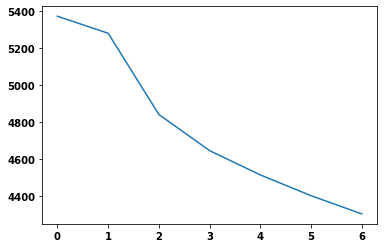

Wall time: 1h 38min 44s


In [8]:
%%time
# On itère sure différentes valeurs de k pour kmeans
# On par tous avec le random_state=26
# On fait 100 initialisation différentes
# on fait maximum 100 itérations par applications de l'algorithme
# Pour chaque valeur de k, on calcul l'inertie
# Plus k augmente, plus l'inertie devrait diminuer (courbe décroissant exponentiellement)
# Étude descriptives des clusters (e.g. nombre moyen de tweets par cluster par valeur de k)
# Pour chaque valeur de k, on garde en mémoire la valeur de l'inertie et le vecteur y de labels
# On va aller analyser les résultats des clusters pour le k juste après le ''elbow''
# Refaire, pour ce même nombre de cluster, du dbscan, complete linkage, single linkage
# Regarder le nombre d'éléments dans l'intersection de kmeans et c'est autres méthodes, par cluster 



k_vect=np.array([90,100,150,200,250,300,350])
labels=[]
inertia=[]

for k in k_vect:
    print(k)
    km=KMeans(n_clusters=k,
             init='k-means++',
             n_init=20,
             max_iter=100,
             random_state=26)
    y_km=km.fit_predict(tfidf_mat_svd)
    inertia_ite=km.inertia_
    labels.append(y_km)
    inertia.append(inertia_ite)
    del y_km
    del inertia_ite
    
plt.figure()
plt.plot(inertia)
plt.show()

In [9]:
# dumping les listes labels et inertia
with open('labels_misc.pkl', 'wb') as f:
    pickle.dump(labels, f)
    
with open('inertia_misc.pkl', 'wb') as f:
    pickle.dump(inertia, f)
    
with open('k_vect_misc.pkl', 'wb') as f:
    pickle.dump(k_vect, f)

In [6]:
# Re-loading results
with open('results/labels_2_11.pkl', 'rb') as f:
    a_labels = pickle.load(f)
with open('results/inertia_2_11.pkl', 'rb') as f:
    a_inertia = pickle.load(f)
with open('results/k_vect_2_11.pkl', 'rb') as f:
    a_k_vect = pickle.load(f)
    
with open('results/labels_12_25.pkl', 'rb') as f:
    b_labels = pickle.load(f)
with open('results/inertia_12_25.pkl', 'rb') as f:
    b_inertia = pickle.load(f)
with open('results/k_vect_12_25.pkl', 'rb') as f:
    b_k_vect = pickle.load(f)
    
with open('results/labels_26_40.pkl', 'rb') as f:
    c_labels = pickle.load(f)
with open('results/inertia_26_40.pkl', 'rb') as f:
    c_inertia = pickle.load(f)
with open('results/k_vect_26_40.pkl', 'rb') as f:
    c_k_vect = pickle.load(f)
    
    
with open('results/labels_41_70.pkl', 'rb') as f:
    d_labels = pickle.load(f)
with open('results/inertia_41_70.pkl', 'rb') as f:
    d_inertia = pickle.load(f)
with open('results/k_vect_41_70.pkl', 'rb') as f:
    d_k_vect = pickle.load(f)
    
with open('results/labels_misc.pkl', 'rb') as f:
    e_labels = pickle.load(f)
with open('results/inertia_misc.pkl', 'rb') as f:
    e_inertia = pickle.load(f)
with open('results/k_vect_misc.pkl', 'rb') as f:
    e_k_vect = pickle.load(f)
total_k_vect=np.hstack((a_k_vect,b_k_vect,c_k_vect,d_k_vect,e_k_vect))
total_inertia=np.hstack((a_inertia,b_inertia,c_inertia,d_inertia,e_inertia))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


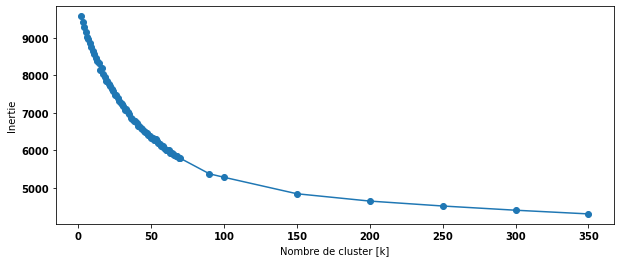

In [7]:
plt.figure(figsize=(10,4))
##############################################################plt.title("Évolution de l'inertie selon le nombre de clusters")
plt.xlabel('Nombre de cluster [k]')
plt.ylabel('Inertie')
#plt.text(150,8000,'SVD:n_components=100\nKmeans: max_iter=100, n_init=20')
#plt.plot(a_k_vect,a_inertia,'-o')
#plt.plot(b_k_vect,b_inertia,'-o')
#plt.plot(c_k_vect,c_inertia,'-o')
#plt.plot(d_k_vect,d_inertia,'-o')
#plt.plot(e_k_vect,e_inertia,'-o')
plt.plot(total_k_vect,total_inertia,'-o')
plt.show()

In [8]:
# On fait un dataframe pour combiner tout nos résultats (a,b,c,d,e)
total_labels=np.transpose(np.vstack((np.array(a_labels),np.array(b_labels),np.array(c_labels),np.array(d_labels),np.array(e_labels))))
df_labels=pd.DataFrame(data=total_labels, columns=list(map(str, total_k_vect)))

In [9]:
# Dictionnaire dont le keys sont nos expériences (valeurs de k)
# Les values sont un aute dictionnaire
# Les keys de ce dictionnaire sont les labels
# Les values sont les index dans tfidf_mat
dict_exp={}


for i in range(total_labels.shape[1]):
    test_labels=total_labels[:,i]
    unique_labels=np.unique(test_labels)
    dict_clusters={}

    for element in unique_labels:
        searchvalue=element
        index=np.where(test_labels == searchvalue)[0]
        dict_clusters[str(element)]=index
    dict_exp['k='+str(total_k_vect[i])]=dict_clusters
    

            

In [25]:
# dumping
#with open('dict_exp.txt', 'wb') as file:
#    pickle.dump(dict_exp, file)
# Re-loading  
with open ('results/dict_exp.txt', 'rb') as file:
    dict_exp = pickle.load(file)


In [26]:
# Je veux sortir les mots les plus fréquent dans un cluster en particulier
cluster=dict_exp['k=350']['16']
submatrix=tfidf_mat[cluster]
nb_tweet_per_word=np.sum(submatrix!=0, axis=0)

sorted_index=np.argsort(-nb_tweet_per_word)

for i in range(100):
    d=sorted_index[0,i]
    if (tfidf.idf_[d])>=5:
        print(nb_tweet_per_word[0,d]/len(cluster))
        print(inv_vocab[d])
        print(tfidf.idf_[d])
        print('\n')

0.9912790697674418
elect
5.749050556357793


0.18023255813953487
result
6.516483376301208


0.0872093023255814
presidenti
7.281826848065642


0.08139534883720931
poll
6.546788725796537


0.07267441860465117
special
6.266828699438666


0.06976744186046512
live
5.1389336055700685


0.06686046511627906
voter
6.846508776807797


0.04941860465116279
democrat
6.190370224992945


0.046511627906976744
candid
6.504122279477634


0.0436046511627907
russia
6.1885765025389174


0.040697674418604654
primari
7.303449312078808


0.040697674418604654
parti
6.29035919684886


0.0377906976744186
general
6.812491891529542


0.03197674418604651
board
5.956157108762186


0.03197674418604651
senat
5.745592339654837


0.03197674418604651
republican
6.276565874716525


0.029069767441860465
race
6.282454017341747


0.029069767441860465
district
6.057736901580107


0.029069767441860465
vote
5.584397646755563


0.02616279069767442
russian
6.586009438949818


0.02616279069767442
night
5.723963721928059


0.026162

In [27]:
print(len(cluster))
print(df_sample['text'][cluster[3]])

344
Lake Co. Comm. primary election results w/ 10 of 10 precincts reporting: Slaughter - 596  Reinicke 558  Hageman 547  Golden 467. #SDPrimary



Quand on a vraiment beaucoup de clusters---> On semble simplement rassembler les tweets qui ont UN mot en commun (e.g. avec k=41, le cluster 7 est simplement tous les tweets qui ont le mots *million* ou encore le cluster 8 qui ne fait que rassembler les tweets avec le mot *year*. Ce ne sont pas des sujets, mais bien simplement des mots en commun qui peuvent être utiliser dans beaucoup de contextes différent!! On voit donc maintenant très bien le danger de *faire trops de clusters*. On hyper-spécialise nos clusters! Ce n'est plus pertinent rendu là. Cluster 9 c'est le mot *week*, cluster 10 c'est *work*. **Sortir des exemples de tweets dans le même clusters MAIS de contexte complètement différents**. E.g. Dans le cluster *week*, un tweet qui parle de la famine en Arique et un autre qui parle du *superbowl*.)



Méthodologie cool: pour une valeur de k, on regarde les tokens qui sont dans 90% des tweets du cluster. On ne s'intérese qu'aux tokens qui ont un idf assez élevé (disons entre 7 et 10). Pas trop rare, mais quand même assez rare.







Peut-être à cause de notre GRANDE réduction de dimensions.

MAIS, cette grand réduction de dimensions étaient nécessaire. On n'arrive même pas encore au *elbow* avec k=70 et ca l'a pris environ 5 heures à runner. Par manque de ressources, on était obliger de grandement réduire pour essayer d'avoir une méthodologie relativement complète.




**On peut runner sur quelques clusters un script que regarde quels mots reveints dans plus de 90% des tweets du cluster.**

Va nous donner une très bonne idées des *sujets* des clusters.

On a maintenant plusiseurs clusters, pour plusieurs valeurs de k différentes.

On fait un numpy array avec par lignes les k et par colonnes les labels pour chacun des 100 000 tweets. (juste un hstack des vecteurs ''labels'').

On veut maintenant aller utiliser la feature ''in_reply_to''.

Pour chaque valeur de k, je regarde si les ''in_reply_to'' font tous partie du meme cluster.

Si les même ''in_reply_to'' sont tous dans un même cluster, je regarde également les ''in_reply_to'' représentent quel pourcentage de ce cluster!! Peut être qu'à un moment donné, les ''in_reply_to'' vont commencer à être leur propre cluster.




Je veux aussi voir si je run un Kmeans avec disons k=5 sur tfidf_mat pas réduite (ca va etre long...), est-ce que j'obtient une répartition similaire à celle obtenue lorsque je réduit à seulement 100 dimensions.




Dernier truc à faire pour réellement avoir utilisé toutes les festures que l'on a sorti: aller voir le nombre moyen de followers dans différents clusters.

# Intéressant à partir d'ici!!!!!!!!!!!!!!!!

**Méthodologie:**

- En regardant notre courbe inertia vs nombre de clusters, on a décider d'explorer k=10, k=20, k=50 et pourquoi pas le cas extrême de k=350.

- On sélectionne l'expérience que l'on veut analyser (dict_cluster[k='what_you_want']).

- On loop sur les clusters (1,2,3,4,...k).

- Pour chaque cluster un extrait la sous-matrice de tfidf_mat correspondant aux indices de ce cluster.

- On regarde les mots qui reviennent dans le plus grand pourcentage de tweet de ce cluster.

- On ne conserve que le tokens dont l'idf est supérieur à 5:
    - permet d'éliminer les clusters dont 100% des tweets contiennent juste un mot ben trop commun (e.g. un cluster dont 100% des tweets auraient le mot ''man'' ne représente absolument aucun sujet.
    - C'est un peu notre manière d'ignorer les clusters ''overfitter'' sur uniquemment un axe (i.e. un mot de vocbaulaire).
    
- On conserve le cluster si au moins 15% des tweets du clusters contiennent un mot dont l'idf est supérieur à 5
    - On combinant le nombre de tweet contenant le mot ET l'idf, on ne va jamais obtenir les mots trops communs (e.g. ''man'') et les mots trop rares (i.e. tous les typos ou les ''aa'',''aaaaa'', etc.)
    
- On observe les thèmes qui en ressort pour chaque cluster.

- Pour les clusters qui semblent les plus intéressant, on fait un visualisation selon 
    - La date de création,
    - Les users ou 
    - Le nombre de followers.


In [28]:
output=[]
k_select=['k=10','k=20','k=50','k=350']

for k in k_select:
    exp=dict_exp[k]
    for i in range(len(exp)):
        cluster=exp[str(i)]
        submatrix=tfidf_mat[cluster]
        nb_tweet_per_word=np.sum(submatrix!=0, axis=0)
        sorted_index=np.argsort(-nb_tweet_per_word)
        
        # On regarde juste les 50 tokens les plus fréquents (devraient être ben en masse)
        for j in range(50):
            d=sorted_index[0,j]
            if nb_tweet_per_word[0,d]/len(cluster)>=0.1:
                if (tfidf.idf_[d])>=5:
                    #print(k)
                    #print(i)
                    percent=nb_tweet_per_word[0,d]/len(cluster)
                    #print(percent)
                    #print(inv_vocab[d])
                    #print(tfidf.idf_[d])
                    #print('\n')
                    
                    to_return={'k':k,'cluster':i,'percent':percent,'token':inv_vocab[d],'idf':tfidf.idf_[d]}
                    output.append(to_return)

            

        

        
        
    

In [29]:
df=pd.DataFrame(output)
print(df_sample['text'][cluster[3]])

Tonight: Public meeting on Alpine Road corridor study https://t.co/nMb6gWs8Z8


In [30]:
# Function to explore the dataframe
def explore(df,k, cluster):
    k='k='+str(k)
    intermediate=df.loc[df['k']==k]
    print(intermediate.loc[intermediate['cluster']==cluster])


# Function to print tweets from a cluster in a particular experience
def print_tweet(df,k,cluster,n=5):
    k='k='+str(k)
    cluster=dict_exp[k][str(cluster)]
    print('nombre de tweets du cluster:'+str(len(cluster)))
    
    for i in range(n):
        print('\n')
        print(df_sample['text'][cluster[i]])
    

In [36]:
k=350
cluster=30

explore(df,k,cluster)
print_tweet(df,k,cluster)

     cluster       idf      k   percent    token
255       30  5.857495  k=350  1.000000  weekend
256       30  5.790306  k=350  0.536585    thing
257       30  6.815842  k=350  0.121951      fun
nombre de tweets du cluster:41


Is this you every weekend?  https://t.co/UksTiQeo3F


Looking for one fun thing to do this weekend? We've got 50 to choose from! https://t.co/EhLFZYcCKK


#TGIF! 50 things to do this weekend https://t.co/fQR8fUvAFh https://t.co/uUfi5ouHEq


Things to do on Fourth of July weekend https://t.co/9hCOx9G8fK #ROC


Community This Weekend https://t.co/3Db9oUftHO https://t.co/zLuWuk7hWl


Les clusters intéressant (le premier chiffres est le paramètre k du kmeans, le deuxième chiffre est le label du cluster en particulier dans cette expérience):


**Messages automatisés:**
- 20,17: post sur facebook (144 tweets)
- 50, 6: post sur facebook (117 tweets)
- 350,5: récapitulation des nouvelles de la semaine (136 tweets) ---> **Voir si la distribution dans le temps** est uniforme (devrait commencer relativement subitement, soit le moment à partir du quel l'automatisation a commencé)
- 350,128: *Get the full story and don't miss a moment. Start Today* (10, dont 5 sont exactement pareil)



**Clusters de Trump**

malgré que l'idf de Trump est inférieur à 5 (notre condition pour ne pas avoir des mots trops communs), on arrive quand même a détecté les clusters de Tump grâce au champ lexical connexe. Ces mots possèdent un idf un peu plus grands et se retrouve dans beaucoup de tweet (e.g. president, donald, administration). Plus *k* augmente, moins il y a de tweet dans le cluster *trump*, parce que en augmentant *k* on est capable d'encore plus spécifié les clusters que simplement *Trump*!!!!!! Intéressant aussi de voir que parfois on obteint les même thèmes avec des *k* différent.

- 10,2 (4122 tweets)
- 20,18 (3375 tweets)
- 50,29 (2617 tweets)


**Police, accidents**
- 50,9: kill, crash, car (794 tweets)
- 50, 17: police (mais idf trop grand), officier, suspect
- 50, 32: charge, arrest (1646 tweets) ----> MAIS EN FAIT C'EST LE TOKEN *man* qui est dans 99% des tweets du cluster DONC PROUVE QU'IL FAUT ABSOLUMENT METTRE UN SEUIL DE IDF. Sinon on regarde un cluster dont le seul point en commun c'est le mot *man*.... C'est pas du tout un thème!
- 350, 15: shoot, suspect, investigation, dead, fatal, officer (96 tweets)


**Élection américaine**
- 20,8: vote, election (1147 tweets)
- 350,16: election, results (344 tweets) ---> **à distribuer dans le temps**


**Politique américaine en général**
- 20,4: bill (parfois confondu avec Bill Gates...), tax, senate, health, GOP (1531 tweets)
- 350, 102: bill (SOUVENT Bill Gates), senate, pass (super intéressant le mot pass!! **Ça pourrait être le cluster que l'on recommende à quelqu'un pour qu'il soit au courant des nouveaux bill passés aux États-Unis!!!!!!!!**)(221 tweets)
- 20,13: house, white (et si on avait descendu le pourcentage minimal, on obtient aussi le token *fire*, soit fort probablement les feux de forêt ou TRUMP QUI RENVOIE DES GENS!) (1421 tweets)
- 350,22: plan, health, care, GOP, would, insurance, cost (32 tweets)


**Suggestions d'activités/fun facts**:
- 350,9: thing know (e.g. *things you need to know*)(presque 100% des tweets du cluster contiennent les deux mots)(83 tweets)
- 350,30: weekend,fun,thing (41 tweets)



**May/brexit/theresa**:
- 50,37: may (may à 100%, mais confond la politicienne et le mois de mai. **Critique de la métho**: les noms propres Theresa May et Bill Gates ont été confondus avec d'autres sujets/noms commun)(88 tweets). **Contient à 10% Brexit**. --> **à distribuer dans le temps**
- 50, 39: may (999 tweets)


**NORTH KOREA!!!!!!!!!!!!!!!!**
- 50,48: north(88%), korea(71%), south(17%), kim(8%), missile(7%), summit(6%), nuclear(6%) (571 tweets). 


**Autres**:
- 350, 105: fire (à 100%) (feu de foret et trump qui fire des gens) --> **à distribuer dans le temps** pour voir s'il y a un spike avec les feux de forêt en Californie de l'an dernier (808 tweets)
- 350,125: world (à 100%), cup (à 20%, mais idf super élevé de 7!!) --> **à distribuer dans le temps** pour voir s'il y a un spike durant la coupe du monde (369 tweets)





La distribution de nos tweets suivent une loi exponentielle selon un coefficient de détermination de 85%. Nous devons donc retirer ce *bruit de fond* de nos résultats (i.e. les distirbutions dans le temps des clusters) pour réellement voir s'il y a un pattern dans le temps particulier à ce cluster.


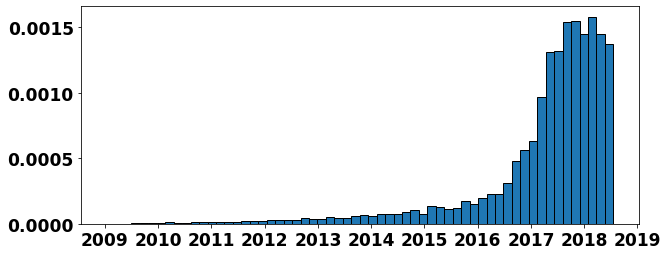

[ 1.81893025e-03 -1.34684917e+03]


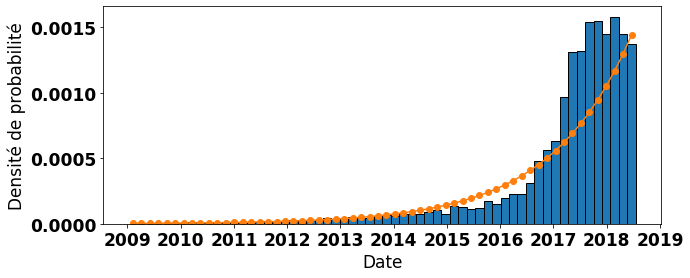

In [163]:
# On trouve nos coefficients de fitting exponentiel
plt.figure(figsize=(10,4))
hist, bins, patches = plt.hist(df_sample['created_at'].values,edgecolor='black',bins=60, density=True)
plt.show()

new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)



fitting=np.polyfit(new_bins, np.log(hist),1)
print(fitting)

def background(x):
    return np.exp(fitting[1]+(fitting[0]*x))
    

plt.figure(figsize=(10,4))
hist, bins, patches = plt.hist(df_sample['created_at'].values,edgecolor='black',bins=60, density=True)
plt.plot(new_bins,background(new_bins),'-o')
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()




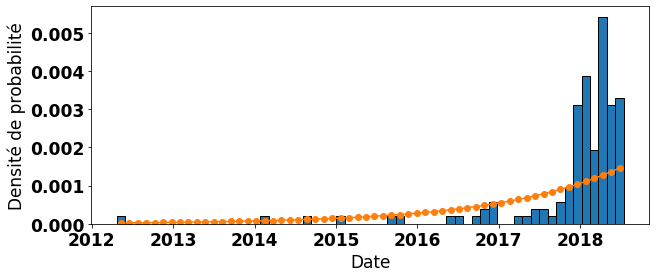

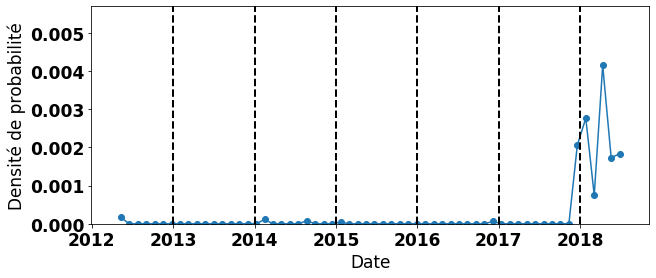

In [196]:
# Distributions dans le temps (6 à faire)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 17}

matplotlib.rc('font', **font)


## messages automatisé
index=dict_exp['k=350']['5']
dates=df_sample['created_at'][index]
plt.figure(figsize=(10,4))
hist, bins, patches=plt.hist(dates, edgecolor='black',bins=60,density=True)
new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)
plt.plot(new_bins,background(new_bins),'-o')
############################################################################plt.title("Temporalité des tweets automatisés")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()


f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(np.datetime64("2013-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2014-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2015-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2016-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2017-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2018-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.axvline(np.datetime64("2019-01-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()





On peut clairement déduire que le message automatisé à commencer à poster dès Janvier 2018.

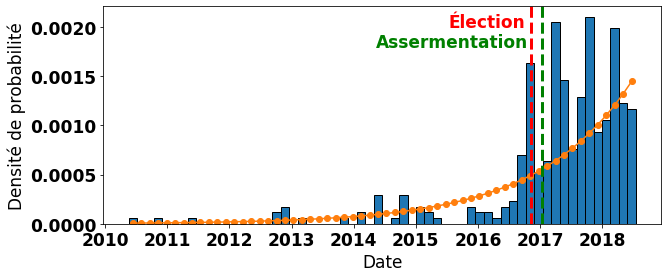

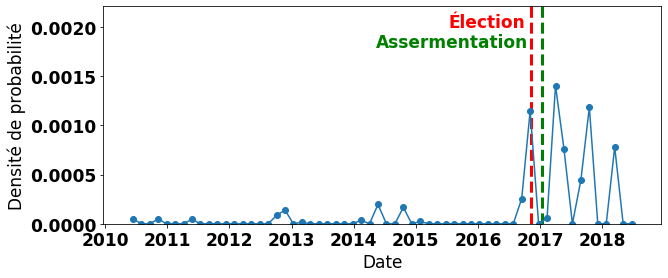

In [223]:
## Résultats des élections
index=dict_exp['k=350']['16']
dates=df_sample['created_at'][index]

election_str="2016-11-09T15:36:19.000000000"
election=np.datetime64(election_str)
assermentation_str="2017-01-09T15:36:19.000000000"
assermentation=np.datetime64(assermentation_str)


plt.figure(figsize=(10,4))
hist,bins,patches=plt.hist(dates, edgecolor='black',bins=60,density=True)

new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)

plt.plot(new_bins,background(new_bins),'-o')
######################################################plt.title("Tweets à propos des RÉSULTATS des élections américaines")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.axvline(election, color='red', linestyle='dashed', linewidth=3)
plt.axvline(assermentation,color='green', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2015-07-09T15:36:19.000000000"), 0.002, 'Élection', color='red')
plt.text(np.datetime64("2014-05-09T15:36:19.000000000"), 0.0018, 'Assermentation', color='green')
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()

f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.axvline(election, color='red', linestyle='dashed', linewidth=3)
plt.axvline(assermentation,color='green', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2015-07-09T15:36:19.000000000"), 0.002, 'Élection', color='red')
plt.text(np.datetime64("2014-05-09T15:36:19.000000000"), 0.0018, 'Assermentation', color='green')
plt.plot(new_bins,new,'-o')
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.show()

On voit clairement un spike le mois même des élections. Le nombre de tweet diminue et ensuite REMONTE EN FLÈCHE lors de son assermentation.

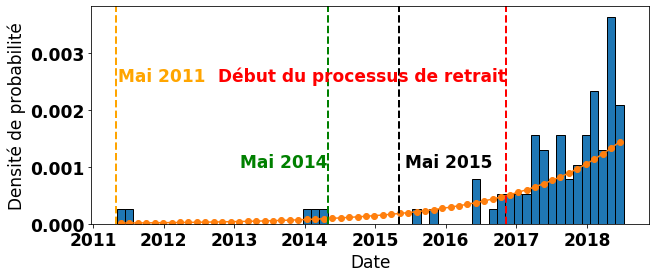

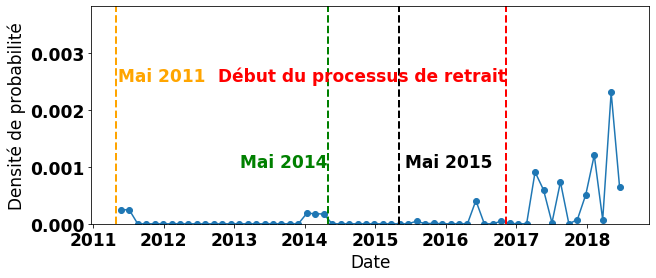

In [234]:
## May/Brexit
index=dict_exp['k=50']['37']
dates=df_sample['created_at'][index]


# Date du début du processus du retrati de l'union européenne
begin_process_str="2017-03-29T15:36:19.000000000"
begin_process=np.datetime64(election_str)


plt.figure(figsize=(10,4))
hist,bins,patches=plt.hist(dates, edgecolor='black',bins=60,density=True)

new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)

plt.plot(new_bins,background(new_bins),'-o')
#################################################################################plt.title("May 100% et 10% de Brexit")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.axvline(begin_process, color='red', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2012-10-10T15:36:19.000000000"), 0.0025, 'Début du processus de retrait', color='red')
plt.axvline(np.datetime64("2014-05-01T15:36:19.000000000"), color='green', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2013-02-01T15:36:19.000000000"), 0.001, 'Mai 2014', color='green')
plt.axvline(np.datetime64("2015-05-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2015-06-01T15:36:19.000000000"), 0.001, 'Mai 2015', color='black')
plt.axvline(np.datetime64("2011-05-01T15:36:19.000000000"), color='orange', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2011-05-10T15:36:19.000000000"), 0.0025, 'Mai 2011', color='orange')
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()


f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(begin_process, color='red', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2012-10-10T15:36:19.000000000"), 0.0025, 'Début du processus de retrait', color='red')
plt.axvline(np.datetime64("2014-05-01T15:36:19.000000000"), color='green', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2013-02-01T15:36:19.000000000"), 0.001, 'Mai 2014', color='green')
plt.axvline(np.datetime64("2015-05-01T15:36:19.000000000"), color='black', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2015-06-01T15:36:19.000000000"), 0.001, 'Mai 2015', color='black')
plt.axvline(np.datetime64("2011-05-01T15:36:19.000000000"), color='orange', linestyle='dashed', linewidth=2)
plt.text(np.datetime64("2011-05-10T15:36:19.000000000"), 0.0025, 'Mai 2011', color='orange')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()

On voit quelques tweet autour des mois de mai 2011 et 2014.

MÉGA SPIKE dès le début du processus de retrait de l'union européenne.

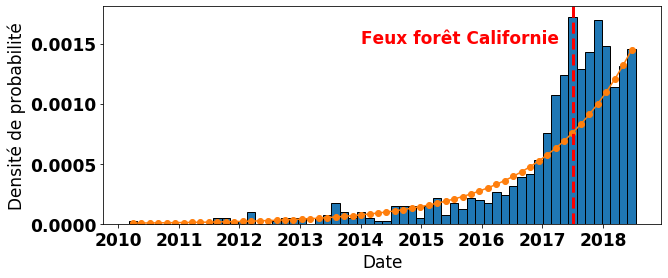

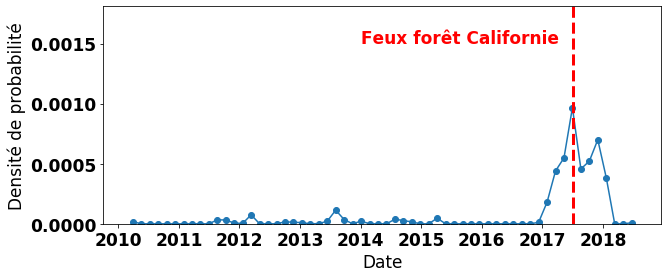

In [238]:
## fire (feux ou renvoyer des gens)
index=dict_exp['k=350']['105']
dates=df_sample['created_at'][index]
plt.figure(figsize=(10,4))
hist,bins,patches=plt.hist(dates, edgecolor='black',bins=60,density=True)
new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)

plt.plot(new_bins,background(new_bins),'-o')
####################################################################plt.title("Tweets mentionant 'fire' ")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.axvline(np.datetime64("2017-07-01T15:36:19.000000000"), color='red', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2014-01-01T15:36:19.000000000"), 0.0015, 'Feux forêt Californie', color='red')
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()

f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(np.datetime64("2017-07-01T15:36:19.000000000"), color='red', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2014-01-01T15:36:19.000000000"), 0.0015, 'Feux forêt Californie', color='red')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()

Feux de forêt ont commencer au mois de juillet 2017. EXACTEMENT PILE SUR NOTRE MÉGA PIC!!!!

Il serait super intéressant de voir si nous avons un autre spike en 2019, puisqu'en ce moment c'est de nouveau les plus gros feux de forêt de l'histoire de la Californie (en 2017 c'était les pires feux de leur histoire, en 2019 c'est le nouveau pire feux de l'histoire. On verrait surement deux spike!). La distribution dans le temps peut également nous permettre de comparer l'attraction médiatique d'évènements comparables (e.g. est ce que le pic serait aussi haut en 2019 qu'en 2017?).

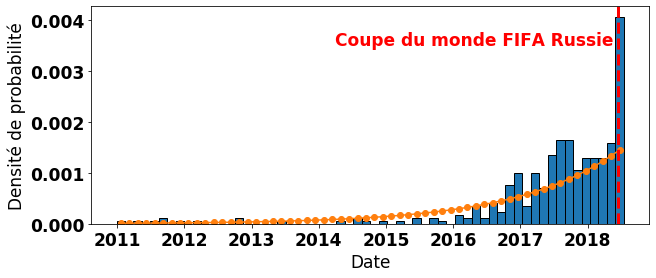

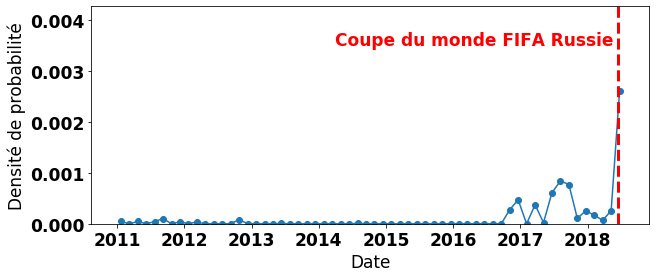

In [242]:
## messages automatisé
index=dict_exp['k=350']['125']
dates=df_sample['created_at'][index]
plt.figure(figsize=(10,4))
hist,bins,patches=plt.hist(dates, edgecolor='black',bins=60,density=True)
new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)
plt.plot(new_bins,background(new_bins),'-o')
##############################################################################plt.title("Tweets mentionant 'world',20% cup  ")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.axvline(np.datetime64("2018-06-14T15:36:19.000000000"), color='red', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2014-04-01T15:36:19.000000000"), 0.0035, 'Coupe du monde FIFA Russie', color='red')
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()

f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(np.datetime64("2018-06-14T15:36:19.000000000"), color='red', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2014-04-01T15:36:19.000000000"), 0.0035, 'Coupe du monde FIFA Russie', color='red')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()

Donc oui le cluster *world* contient plein de trucs pas relié à la coupe du monde (e.g. world war), mais il y a clairement un spike autour de la coupe du monde, ce qui concorde avec le fait que 20% des tweets contiennent également le mot *cup*.

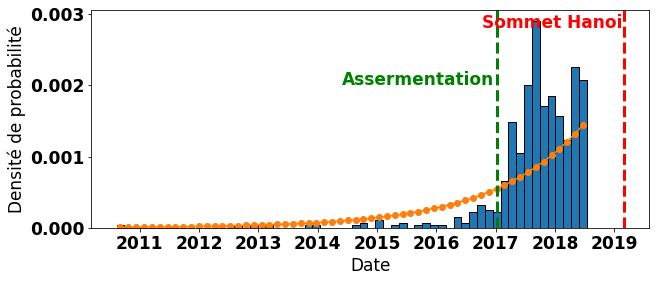

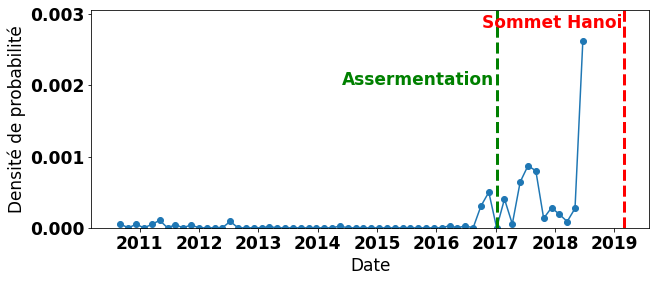

In [253]:
## North Korea
index=dict_exp['k=50']['48']
dates=df_sample['created_at'][index]

election_str="2016-11-09T15:36:19.000000000"
election=np.datetime64(election_str)
assermentation_str="2017-01-09T15:36:19.000000000"
assermentation=np.datetime64(assermentation_str)


plt.figure(figsize=(10,4))
hits,bins,pathces=plt.hist(dates, edgecolor='black',bins=60,density=True)
new_bins=[]
for i in range(len(bins)-1):
    new_bins.append((bins[i]+bins[i+1])/2)
new_bins=np.array(new_bins)
plt.plot(new_bins,background(new_bins),'-o')
#######################################################################plt.title("88% North et 71% Korea")
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.axvline(assermentation,color='green', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2014-06-01T15:36:19.000000000"), 0.002, 'Assermentation', color='green')
plt.axvline(np.datetime64("2019-02-27T15:36:19.000000000"),color='red', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2016-10-09T15:36:19.000000000"), 0.0028, 'Sommet Hanoi', color='red')
x_lim=plt.xlim()
y_lim=plt.ylim()
plt.show()

f=lambda a: (abs(a)+a)/2
new=f(hist-background(new_bins))
plt.figure(figsize=(10,4))
plt.plot(new_bins,new,'-o')
plt.axvline(assermentation,color='green', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2014-06-01T15:36:19.000000000"), 0.002, 'Assermentation', color='green')
plt.axvline(np.datetime64("2019-02-27T15:36:19.000000000"),color='red', linestyle='dashed', linewidth=3)
plt.text(np.datetime64("2016-10-09T15:36:19.000000000"), 0.0028, 'Sommet Hanoi', color='red')
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Date')
plt.ylabel('Densité de probabilité')
plt.show()

Il serait super intéressant de voir le spike de tweet lors du sommet de Hanoi (rencontre entre Trump et Kim Jong-un!!).

On démontre que la visualistion dans le temps peut servir a différentes choses (oui, observer la progression d'un thème dans le temps, MAIS ÉGALEMENT, comme avec les messages automatisé, de déduire l'implémentation d'une nouvelle features sur une plateforme).

# Références
pour estimer le nombre d'itérations nécessaire pour atteindre la convergence de kmeans (il doit y avoir quelque chose d'intelligent à retirer de cet article pour notre tp): http://www.iro.umontreal.ca/~lisa/pointeurs/kmeans-nips7.pdf